# Trabajo Practico N° 2 - Mineria de datos

**Alumnos:**

* Donnarumma, Cesar Julian
* Longo Bruno

# Librerias:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import decomposition
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import  GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

# Conjunto de datos: Companies.csv (Actividades 1 y 2)

1. Descargar el conjunto de datos, 1000_Companies.csv1, para realizar el trabajo práctico. Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.) y elegir un método de estandarización.

2. Realizar la estimación del atributo Profit utilizando árboles de decisión (Regresión) analizando los parámetros máximo profundidad, número mínimo de observaciones, número mínimo de observaciones por separación y criterio de separación. Graficar el árbol obtenido en el proceso de entrenamiento y mostrar los resultados sobre dos conjuntos de test (Error Absoluto Medio, Error Cuadrático Medio y Raíz del Error Cuadrático Medio).

## Analisis de datos:

In [ ]:
# Carga del dataset
companies = pd.read_csv('1000_Companies.csv')

In [ ]:
# Informacion de las columnas
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


No hay valores nulos

In [ ]:
# Mostramos un poco las primeras filas
companies.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# Algunas medidas de resumen por columna
companies.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [ ]:
# Cada uno de los estados a los que pueden pertenecer las 1000 columnas
companies['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

Boxplot de cada una de las caracteristicas:

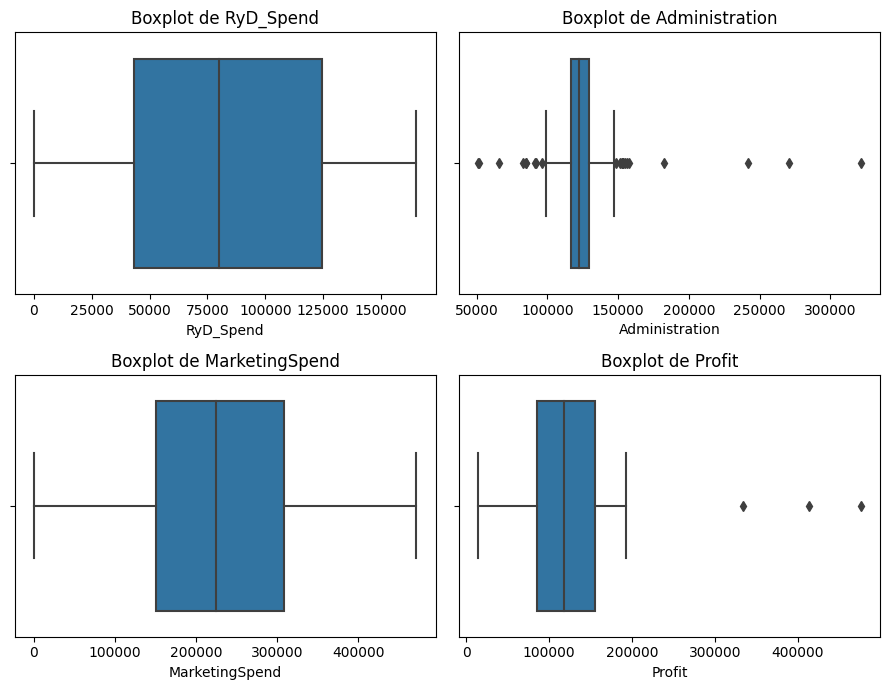

In [ ]:
# Crear una figura con 2 filas y 2 columnas para los subplots
fig, axes = plt.subplots(2, 2, figsize=(9, 7))

# Variables para graficar en los subplots
variables = companies.drop(['State'], axis=1).columns

# Crear boxplots en los subplots
for i, columna in enumerate(variables):
    row, col = divmod(i, 2)  # Calcular la fila y columna actual
    sns.boxplot(x=companies[columna], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot de {columna}')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

A simple vista algunas caracteristicas no presentan valores atipicos, las ganancias presenta 3 valores atipicos unicamente y segun el boxplot los gastos de administracion presentan bastantes.

Boxplot de caracteristicas agrupados por estado para poder analizar mejor los valores atipicos:

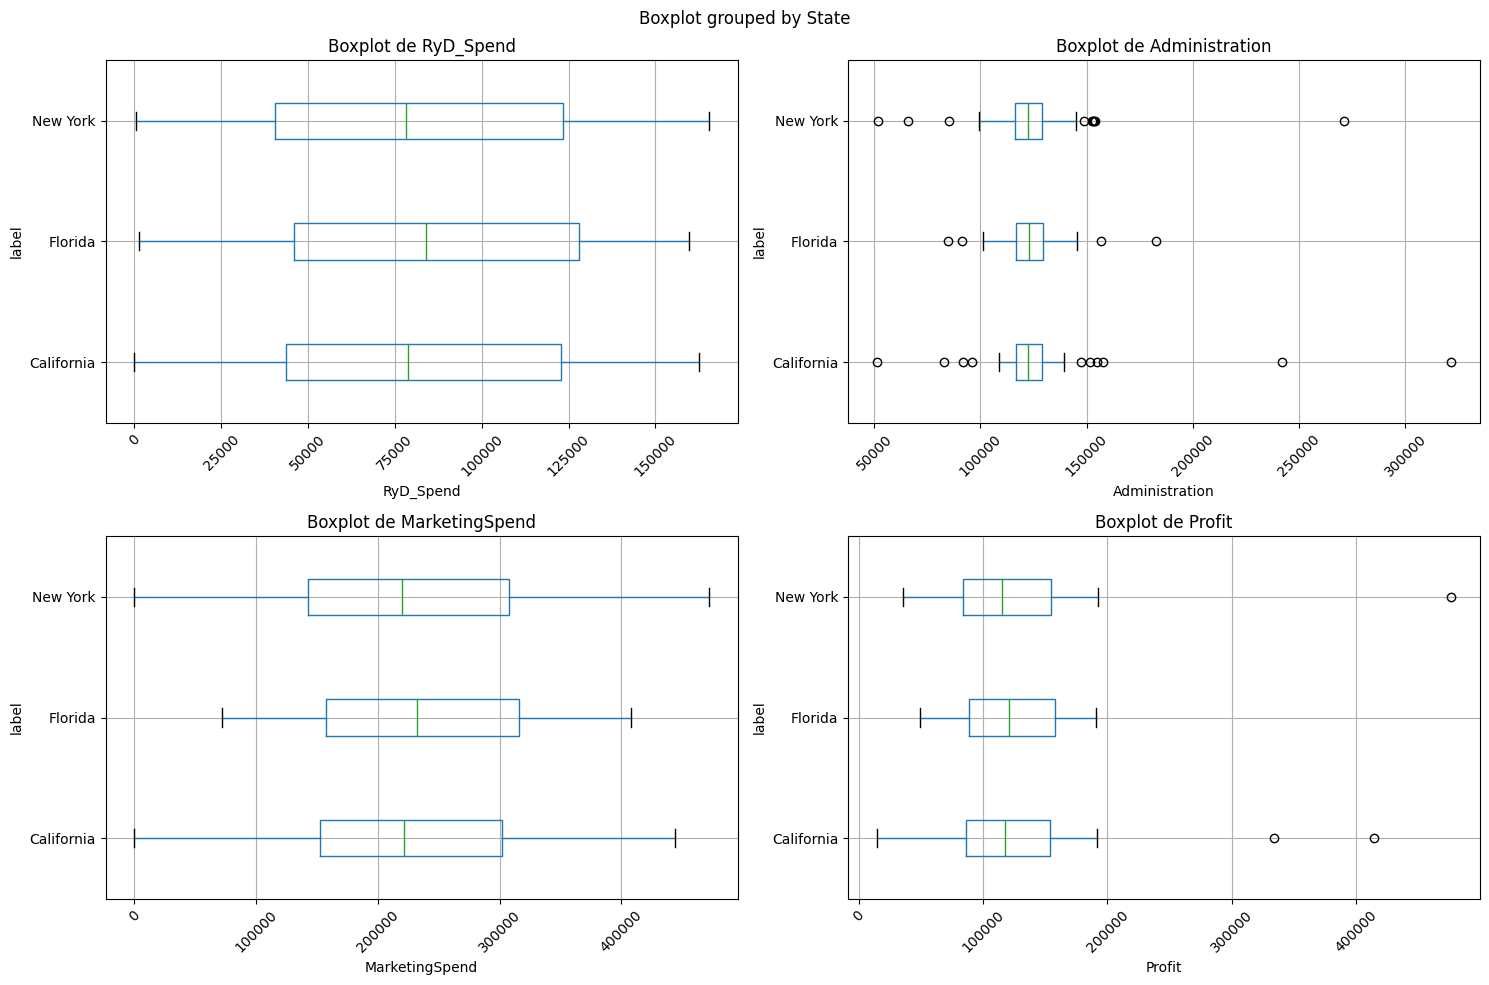

In [ ]:
# Crear una figura con subtramas de 2x2
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Lista de columnas
columnas = ['RyD_Spend', 'Administration', 'MarketingSpend', 'Profit']

# Recorre las subtramas y crea los boxplots
for i, columna in enumerate(columnas):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    companies.boxplot(column=columna, by='State', vert=False, ax=ax)
    ax.set_xlabel(columna)
    ax.set_ylabel('label')
    ax.set_title(f'Boxplot de {columna}')
    ax.tick_params(axis='x', rotation=45)

# Ajusta el espaciado entre las subtramas
plt.tight_layout()

# Muestra el gráfico
plt.show()


Teniendo en cuenta los boxplots agrupados por estado se puede ver que efectivamente no hay atipicos gastos de RyD y de Marketing, que los atipicos de ganancias pertenecen uno a Nueva York, 2 a california y Florida no presenta, y que en gastos de administracion todos los estados presentan, aunque Florida es la que menos.

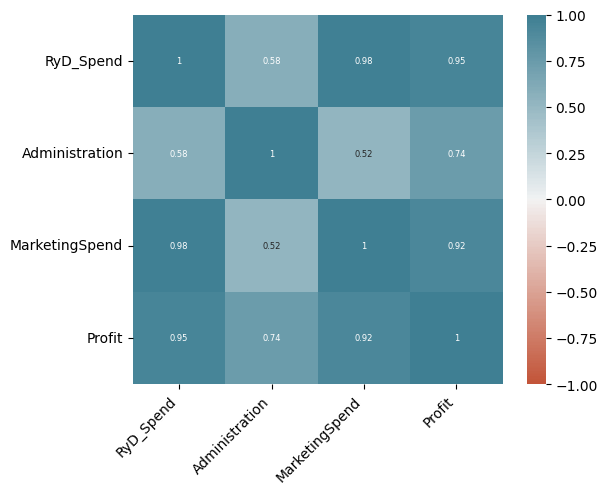

In [ ]:
# Matriz de correlacion:
corr = companies.drop(['State'], axis=1).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Todas las variables tienen correlacion entre si entre mediana y alta. Destaca Profit que tiene bastante con el resto, y Marketing que tiene alta con RyD Spend.

Estandarizacion z-score:

In [ ]:
# Descartamos la columna con los estados:
companies_2 = companies.drop(['State'], axis=1)

# Estandarizacion z-score:
companies_z = (companies_2 - companies_2.mean()) / companies_2.std()

In [ ]:
# Dividimos variables independientes de variables dependientes:
X = companies_z.iloc[:, :3]
y = companies_z.iloc[:, 3]

## Regresion Tree:

### Primeros modelos (80% Train - 20% Test):

#### Modelo sin optimizacion de hiperparametros:

En una primera aproximacion probamos con un modelo con hiperparametros puestos por nosotros sin optimizar para tener contra que comparar luego.

In [ ]:
# Division en train y test 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
feature_list = list(X_train.columns)

In [ ]:
# Creacion del modelo
clf = tree.DecisionTreeRegressor(max_depth=6,min_samples_leaf=1, min_samples_split=2, random_state=0)

In [ ]:
# Entrenamiento
regressor_tree = clf.fit(X_train, y_train)
# Predicciones de train
predictions_train = clf.predict(X_train)
# Predicciones de test
predictions_test = clf.predict(X_test)

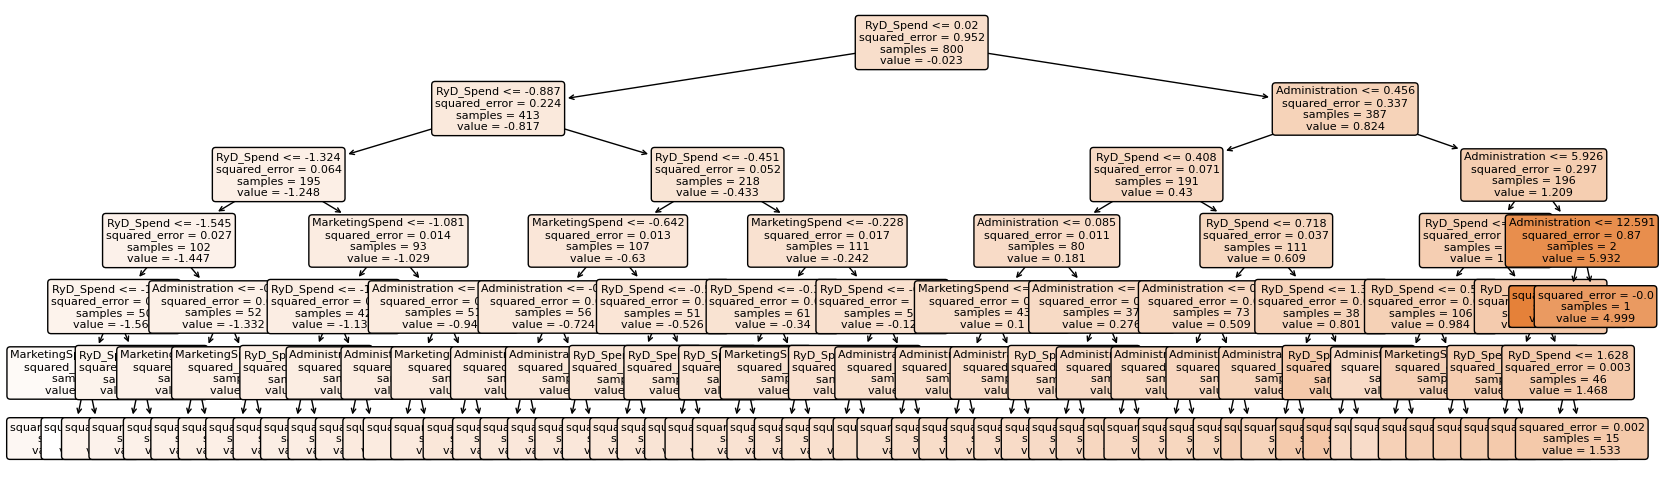

In [ ]:
# Grafica del arbol
features = feature_list

plt.figure(figsize=(20,6))
tree.plot_tree(regressor_tree,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

Metricas:

In [ ]:
# Funcion para calcular R2 Ajustado
def r2_ajustado(y, predictions, feature_list):
  n = len(y)
  p = len(feature_list)
  r2 = r2_score(y, predictions)
  r2_adjusted_test = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
  return r2_adjusted_test

In [ ]:
y_test = y_test.astype(float)
y_train = y_train.astype(float)

# Metricas de train
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = np.sqrt(mse_train)
r2_ajus_train = r2_ajustado(y_train, predictions_train, feature_list)

# Metricas de test:
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)
r2_ajus_test = r2_ajustado(y_test, predictions_test, feature_list)

# Meter metricas en DF para comparar.
index = {0: 'mae', 1: 'mse', 2: 'rmse', 3: 'r2_ajustado'}
train = [mae_train, mse_train, rmse_train, r2_ajus_train]
test = [mae_test, mse_test, rmse_test, r2_ajus_test]

metricas = pd.DataFrame(index=index)
metricas['80-20 train s/o'] = train # 80-20 train sin optimizacion
metricas['80-20 test s/o'] = test # 80-20 test sin optimizacion
metricas = metricas.rename(index=index)
metricas

,80-20 train s/o,80-20 test s/o
mae,0.023742,0.038492
mse,0.001103,0.014491
rmse,0.033211,0.120379
r2_ajustado,0.998837,0.987503


* Al parecer todos los errores dan metricas bastante buenas.

* Segun el R2 ajustado el modelo se ajusta bastante bien a los datos. Es muy alto (y muy parecido en train y en test, al ser parecidas el modelo no estaria teniendo problemas para generalizar con nuevos datos).

* Ademas teniendo en cuenta que nuestro dataset tiene valores atipicos el MAE es bastante robusta como metrica. El valor da bastante bajo.

In [ ]:
tabla_predicciones = pd.DataFrame({'80-20 y_test':y_test, '80-20 predictions_test s/o':predictions_test})
tabla_predicciones

,80-20 y_test,80-20 predictions_test s/o
993,-0.711940,-0.707379
859,-0.743591,-0.753302
298,-0.593463,-0.578817
553,1.302212,1.322506
672,-0.843803,-0.905511
...,...,...
679,1.054681,1.099643
722,1.139137,1.099643
215,0.616247,0.603680
653,0.502152,0.494133


* La tabla anterior parece confirmar lo que las metricas dicen, los valores de las predicciones de nuestro arbol de regresion son bastante parecidos a los valores reales del conjuto y_test.

#### Modelo con optimizacion de hiperparametros:

In [ ]:
# Grilla de valores con los que se va probar
param_grid = {
    'max_depth': [None, 2, 3, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Modelo de optimizacion usando validacion cruzada (5 folds)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, )
grid_search.fit(X_train, y_train)

# Mejores parametros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Nos quedamos con el mejor modelo
best_model = grid_search.best_estimator_

predictions_test = best_model.predict(X_test)
predictions_train = best_model.predict(X_train)

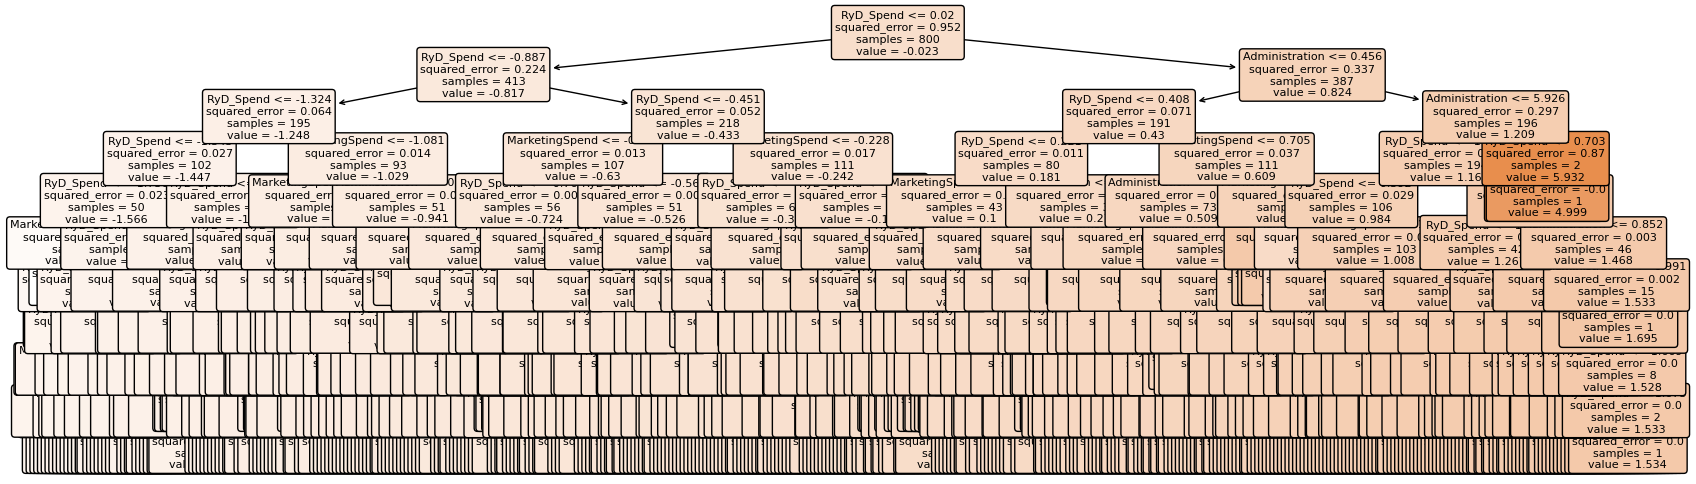

In [ ]:
# Grafica del arbol
features = feature_list

plt.figure(figsize=(20,6))
tree.plot_tree(best_model,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

In [ ]:
y_test = y_test.astype(float)
y_train = y_train.astype(float)

# Test:
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)
r2_ajus_test = r2_ajustado(y_test, predictions_test, feature_list)

# Train
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = np.sqrt(mse_train)
r2_ajus_train = r2_ajustado(y_train, predictions_train, feature_list)

train = [mae_train, mse_train, rmse_train, r2_ajus_train]
test = [mae_test, mse_test, rmse_test, r2_ajus_test]

metricas['80-20 train c/o'] = train # 80-20 train con optimizacion
metricas['80-20 test c/o'] = test # 80-20 train con optimizacion
metricas

,80-20 train s/o,80-20 test s/o,80-20 train c/o,80-20 test c/o
mae,0.023742,0.038492,0.000801,0.025768
mse,0.001103,0.014491,0.000002,0.057492
rmse,0.033211,0.120379,0.001573,0.239776
r2_ajustado,0.998837,0.987503,0.999997,0.950417


* En train vemos como con optimizacion del modelo las metricas han mejorado respecto a los resultados del modelo sin optimizacion pero a costa de tener un modelo que en test tiene metricas peores, es decir un modelo que generaliza peor. Por lo tanto un modelo mas sobreajustado.

* Comparando las metricas de test de ambos modelos se prefiere usar RMSE. El modelo sin optimizacion tiene metricas mejores.






In [ ]:
tabla_predicciones['80-20 predictions_test c/o'] = predictions_test
tabla_predicciones

,80-20 y_test,80-20 predictions_test s/o,80-20 predictions_test c/o
993,-0.711940,-0.707379,-0.712896
859,-0.743591,-0.753302,-0.742137
298,-0.593463,-0.578817,-0.594100
553,1.302212,1.322506,1.296854
672,-0.843803,-0.905511,-0.841751
...,...,...,...
679,1.054681,1.099643,1.057206
722,1.139137,1.099643,1.140471
215,0.616247,0.603680,0.616008
653,0.502152,0.494133,0.501933


### Segundo modelo (70% Train - 30% Test) :

#### Modelo sin optimizacion de hiperparametros

Probamos mismos hiperparemtros iniciales con 70-30

In [ ]:
# Division en train-test 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
feature_list = list(X_train.columns)

In [ ]:
# Creacion del modelo
clf = tree.DecisionTreeRegressor(max_depth=6,min_samples_leaf=1, min_samples_split=2, random_state=0)

In [ ]:
regressor_tree = clf.fit(X_train, y_train)
predictions_train = clf.predict(X_train)
predictions_test = clf.predict(X_test)

In [ ]:
features = feature_list

plt.figure(figsize=(30,10))
tree.plot_tree(regressor_tree,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

Metricas:

In [ ]:
y_test = y_test.astype(float)
y_train = y_train.astype(float)

# Test:
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)
r2_ajus_test = r2_ajustado(y_test, predictions_test, feature_list)

# Train
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = np.sqrt(mse_train)
r2_ajus_train = r2_ajustado(y_train, predictions_train, feature_list)

train = [mae_train, mse_train, rmse_train, r2_ajus_train]
test = [mae_test, mse_test, rmse_test, r2_ajus_test]

metricas['70-30 train s/o'] = train # 70-30 train sin optimizacion
metricas['70-30 test s/o'] = test # 70-30 train sin optimizacion
metricas

,80-20 train s/o,80-20 test s/o,80-20 train c/o,80-20 test c/o,70-30 train s/o,70-30 test s/o
mae,0.023742,0.038492,0.000801,0.025768,0.022288,0.044870
mse,0.001103,0.014491,0.000002,0.057492,0.000940,0.023693
rmse,0.033211,0.120379,0.001573,0.239776,0.030657,0.153924
r2_ajustado,0.998837,0.987503,0.999997,0.950417,0.998994,0.978825


* Metricas en test y train bastante cercanas. Tiene mas overfitting que el primero pero menos que el segundo.

* Segun las metricas y comparando con RMSE en test de los 3 modelos logrados hasta ahora es el segundo mejor.

#### Modelo con optimizacion de hiperparametros

In [ ]:
# Grilla de valores a probar
param_grid = {
    'max_depth': [None, 2, 3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Optimizacion de hiperparametros
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejores parametros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
# Nos quedamos con el mejor modelo
best_model = grid_search.best_estimator_

predictions_test = best_model.predict(X_test)
predictions_train = best_model.predict(X_train)

In [ ]:
# Grafica del arbol
features = feature_list

plt.figure(figsize=(20,6))
tree.plot_tree(best_model,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

In [ ]:
y_test = y_test.astype(float)
y_train = y_train.astype(float)

# Test:
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)
r2_ajus_test = r2_ajustado(y_test, predictions_test, feature_list)

# Train
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = np.sqrt(mse_train)
r2_ajus_train = r2_ajustado(y_train, predictions_train, feature_list)

train = [mae_train, mse_train, rmse_train, r2_ajus_train]
test = [mae_test, mse_test, rmse_test, r2_ajus_test]

metricas['70-30 train c/o'] = train # 80-20 train con optimizacion
metricas['70-30 test c/o'] = test # 80-20 train con optimizacion
metricas

,80-20 train s/o,80-20 test s/o,80-20 train c/o,80-20 test c/o,70-30 train s/o,70-30 test s/o,70-30 train c/o,70-30 test c/o
mae,0.023742,0.038492,0.000801,0.025768,0.022288,0.044870,0.004831,0.027040
mse,0.001103,0.014491,0.000002,0.057492,0.000940,0.023693,0.000540,0.023061
rmse,0.033211,0.120379,0.001573,0.239776,0.030657,0.153924,0.023239,0.151860
r2_ajustado,0.998837,0.987503,0.999997,0.950417,0.998994,0.978825,0.999422,0.979389


* Nuevamente muy poco overfitting.

* Mejoro muy poco las metricas del 70-30 optimizacion. Pero esta vez si se mejoraron.

### Conclusiones Regression Tree:

Segun las metricas obtenidas:

* Se lograron modelos con muy poco overfitting.

* De todos los modelos probados se prefiere el primer modelo 80-20 sin optimizacion de hiperparametros, con MSE 0.001, MAE 0.038 y R2 adj 0.987 para el testeo.

* Al parecer para este caso un modelo de arbol de regresion sirve para nuestro conjunto de datos.

De todos modos hay que tener en cuenta que las metricas obtenidas no son demasiado robustas ya que son metricas obtenidas sobre un unico conjunto de test. Por lo que en ese conjunto de test pueden haber caido datos mas o menos convenientes para que las metricas hayan dado asi. Lo mejor habria sido hacer validacion cruzada para las metricas.

Suponemos que las métricas son tan buenas porque las 3 variables utilizadas tienen mucha correlación con la variable target. El gasto de las empresas en marketing, investigación y desarrollo son vitales para lograr ganancias.

# Conjunto de datos: PokemonDB.csv (Actividades 3, 4, 5 y 6)

3. Descargar el conjunto de datos, PokemonDB.csv2, para realizar el trabajo práctico. Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.)

4. Realizar la estimación del atributo Type utilizando árboles de decisión (Clasificación) analizando los parámetros máximo profundidad, número mínimo de observaciones, número mínimo de observaciones por separación y criterio de separación. Graficar el árbol obtenido en el proceso de entrenamiento y mostrar los resultados sobre dos conjuntos de test (Precisión, Exhaustividad y Exactitud).

5. Realizar la estimación del atributo Type utilizando Bayes Ingenuo. Aquí deberá considerar un criterio de división de los atributos para discretizarlos. Mostrar los resultados sobre dos conjuntos de test (Precisión, Exhaustividad y Exactitud).

6. Realizar la estimación del atributo Type utilizando k-NN analizando los parámetros cantidad de vecinos, métrica y valor de p. Mostrar los resultados sobre un conjunto de test (Precisión, Exhaustividad y Exactitud).

## Analisis de Datos:

In [ ]:
# Carga del dataset
pokemon = pd.read_csv('PokemonDB.csv')

In [ ]:
# Informacion sobre las columnas
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1190 non-null   object
 1   Type     1190 non-null   object
 2   HP       1190 non-null   int64 
 3   Attack   1190 non-null   int64 
 4   Defense  1190 non-null   int64 
 5   Sp. Atk  1190 non-null   int64 
 6   Sp. Def  1190 non-null   int64 
 7   Speed    1190 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 74.5+ KB


Nuevamente no hay nulos, 1190 pokemons, 8 columnas

In [ ]:
# Primeras filas
pokemon.head()

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65


In [ ]:
# Tipos de pokemon posibles
pokemon['Type'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

In [ ]:
# Cantidad segun tipo de pokemon
pokemon['Type'].value_counts()

Water       149
Normal      131
Grass       104
Bug          91
Psychic      82
Fire         75
Electric     73
Rock         67
Dark         56
Fighting     49
Dragon       47
Ghost        47
Poison       46
Ground       46
Ice          43
Steel        43
Fairy        31
Flying       10
Name: Type, dtype: int64

El dataset esta bastante desbalanceado respecto a la variable type.

Boxplot de caracteristicas:

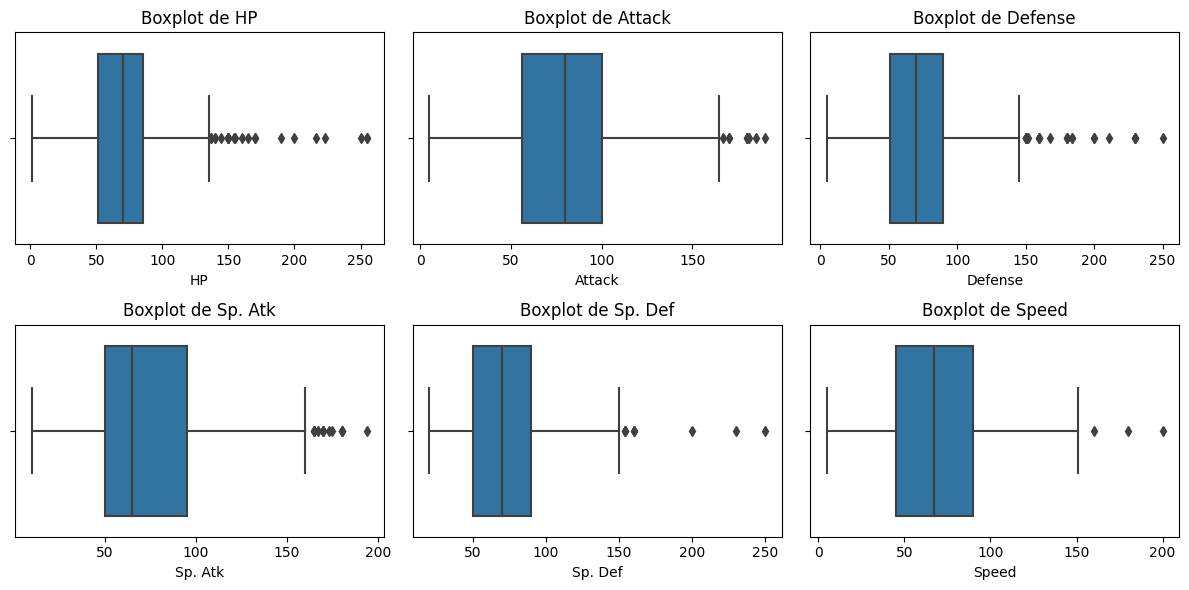

In [ ]:
# Crear una figura con 2 filas y 2 columnas para los subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Variables para graficar en los subplots
variables = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# Crear boxplots en los subplots
for i, columna in enumerate(variables):
    row, col = divmod(i, 3)  # Calcular la fila y columna actual
    sns.boxplot(x=pokemon[columna], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot de {columna}')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

A simple vista todas las caracteristicas presentan valores atipicos hacia la derecha.

Boxplot de caracteristicas agrupadas por tipo:

<Figure size 2500x1500 with 0 Axes>

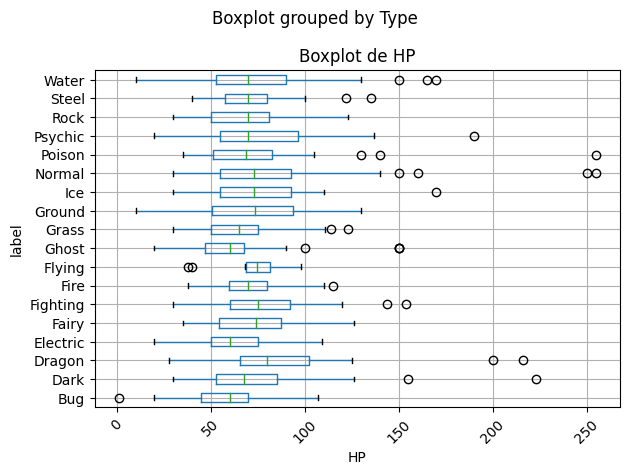

<Figure size 2500x1500 with 0 Axes>

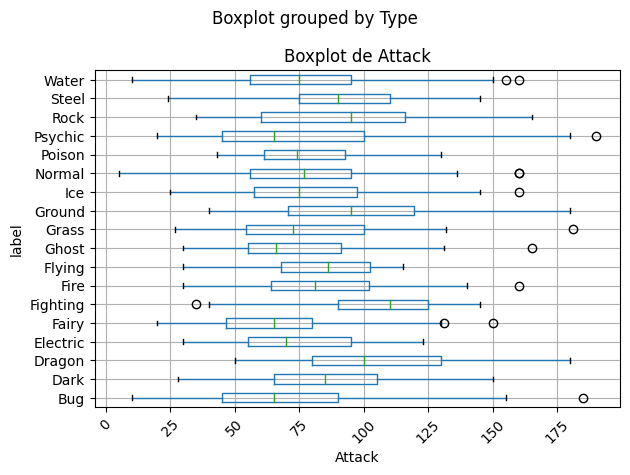

<Figure size 2500x1500 with 0 Axes>

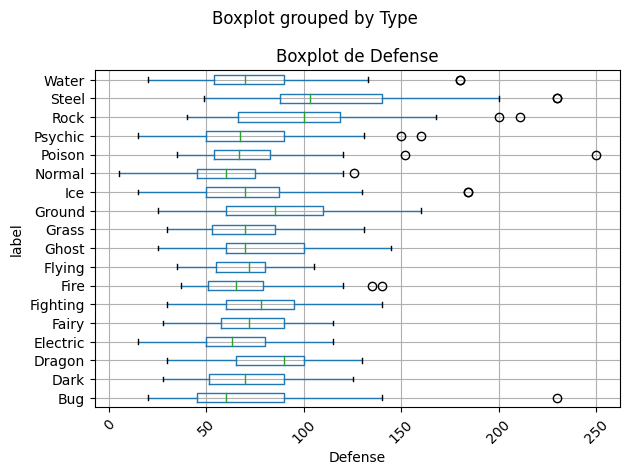

<Figure size 2500x1500 with 0 Axes>

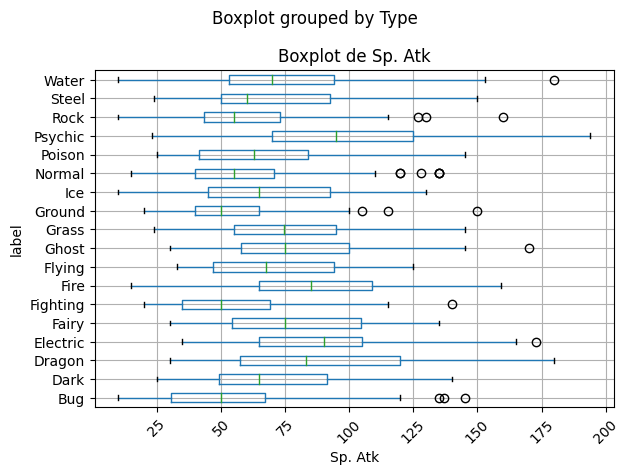

<Figure size 2500x1500 with 0 Axes>

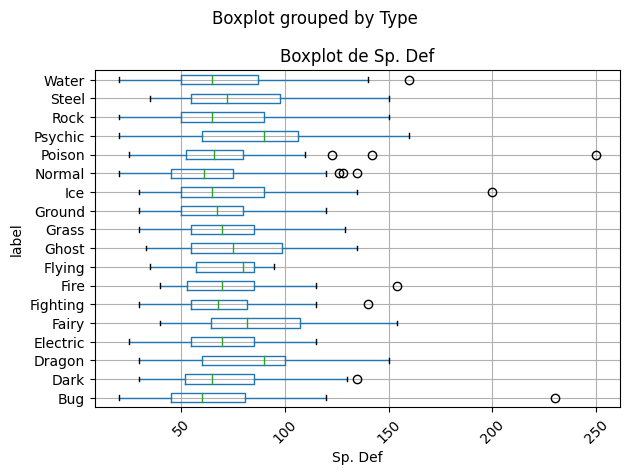

<Figure size 2500x1500 with 0 Axes>

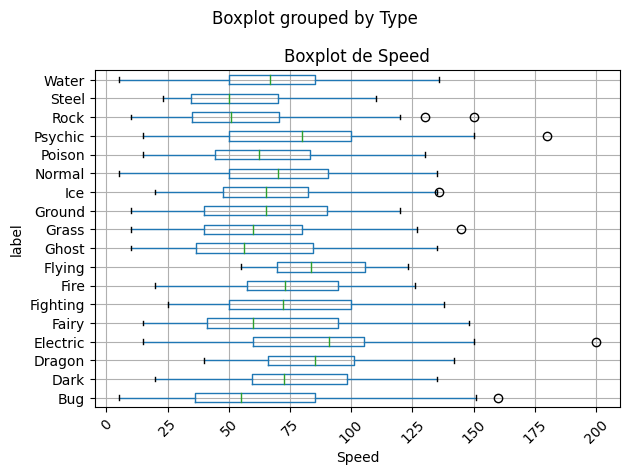

In [ ]:
for columna in variables:
    plt.figure(figsize=(25, 15))
    pokemon.boxplot(column=columna, by='Type', vert=False)
    plt.xlabel(columna)
    plt.ylabel('label')
    plt.title(f'Boxplot de {columna}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Teniendo en cuenta los distintos tipos en cada caracteristicas, por caracteristica no necesariamente todos los tipos presentan valores atipicos.

In [ ]:
# Medidas resumen:
pokemon.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,70.852941,80.957983,74.586555,72.756303,72.050420,69.695798
std,26.886443,32.119650,30.718212,32.658636,27.637522,30.204376
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,51.250000,56.000000,51.000000,50.000000,50.000000,45.000000
50%,70.000000,80.000000,70.000000,65.000000,70.000000,67.000000
75%,85.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


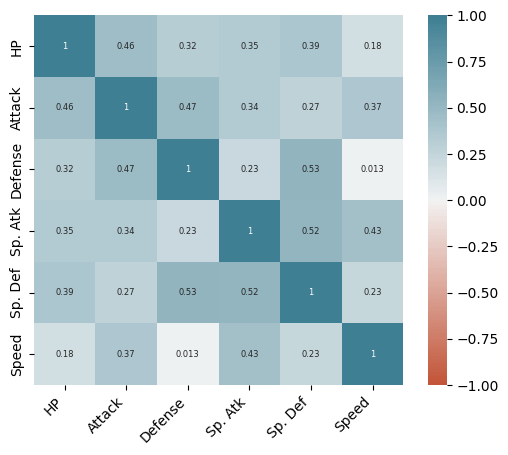

In [ ]:
# Matriz de correlacion
corr = pokemon[variables].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

No hay correlaciones muy altas, la mas alta es 0.53 entre defensa y sp def.

## Decisicion Tree:

### Primer modelo (80% Train - 20% Test):

#### División train-test

In [ ]:
# Division 80-20
df_train, df_test = train_test_split(pokemon, test_size=0.2, random_state=0)

In [ ]:
# Extraer las etiquetas (variable objetivo) de la columna 'Type' en los DataFrames 'df_train' y 'df_test', y convertirlas en arreglos NumPy.
train_labels = np.array(df_train['Type'])
test_labels = np.array(df_test['Type'])

# Eliminar las etiquetas y la columna 'Name' para separar las características (variables independientes) de la variable objetivo.
df_train = df_train.drop(['Type', 'Name'], axis=1)
df_test = df_test.drop(['Type', 'Name'], axis=1)

# Lista de nombres de características extrayendo los nombres de columna del DataFrame 'df_train' para usarlos luego.
feature_list = list(df_train.columns)

# Convierte los DataFrames modificados (sin las columnas 'Type' y 'Name), es decir, las características (variables independientes) a arrays.
train_features = np.array(df_train)
test_features = np.array(df_test)

#### Modelo sin optimizacion

In [ ]:
# Creacion del modelo, con parametros por defecto
clf = tree.DecisionTreeClassifier()

In [ ]:
#Entreno el modelo pasando las características de entrenamiento (train_features) y las etiquetas de entrenamiento correspondientes (train_labels).
decision_tree = clf.fit(train_features, train_labels)

# Predicciónes en el conjunto de entrenamiento
clf_predictions_train = clf.predict(train_features)

# Predicciónes en el conjunto de prueba
clf_predictions_test = clf.predict(test_features)

In [ ]:
# Evaluar el rendimiento del modelo
train_accuracy = accuracy_score(train_labels, clf_predictions_train)
test_accuracy = accuracy_score(test_labels, clf_predictions_test)

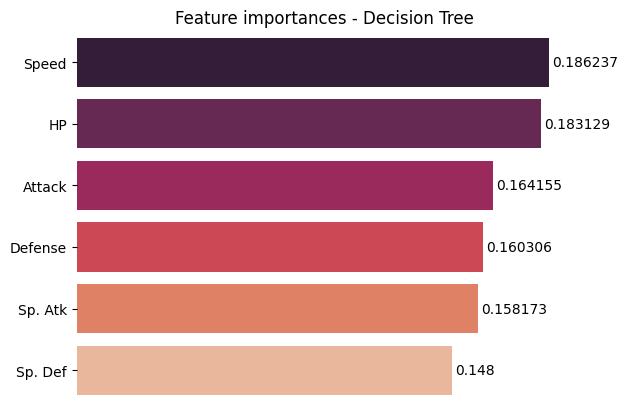

In [ ]:
# Creamos un DF con dos columnas -> Caracteristica y ganacia de informacion
features_df = pd.DataFrame({'features': feature_list, 'importances': decision_tree.feature_importances_ })

# Ordeno en base a la importancia
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

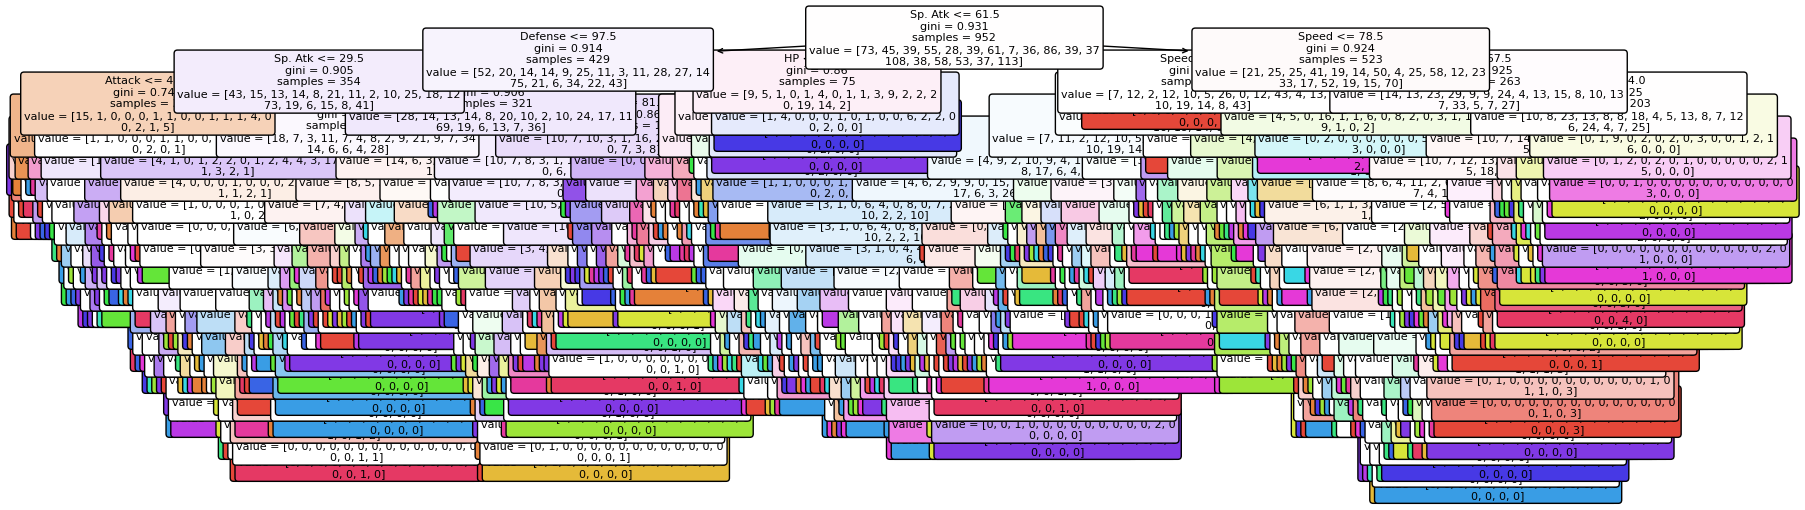

In [ ]:
features = feature_list # Nombres de cada columna
plt.figure(figsize=(20,6))
tree.plot_tree(decision_tree,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

Metricas:

In [ ]:
# Metricas train:
accuracy_train = accuracy_score(train_labels, clf_predictions_train)
precision_train = precision_score(train_labels, clf_predictions_train, average='macro')
recall_train = recall_score(train_labels, clf_predictions_train, average='macro')
f1_train = f1_score(train_labels, clf_predictions_train, average='macro')

# Metricas test:
accuracy_test = accuracy_score(test_labels, clf_predictions_test)
precision_test = precision_score(test_labels, clf_predictions_test, average='macro')
recall_test = recall_score(test_labels, clf_predictions_test, average='macro')
f1_test = f1_score(test_labels, clf_predictions_test, average='macro')

metricas_arbol_clasificacion = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1-score'])
metricas_arbol_clasificacion['80-20 s/o train'] = [accuracy_train, precision_train, recall_train, f1_train]
metricas_arbol_clasificacion['80-20 s/o test'] = [accuracy_test, precision_test, recall_test, f1_test]
metricas_arbol_clasificacion

,80-20 s/o train,80-20 s/o test
accuracy,0.977941,0.189076
precision,0.979446,0.154512
recall,0.982779,0.159478
f1-score,0.980622,0.144954


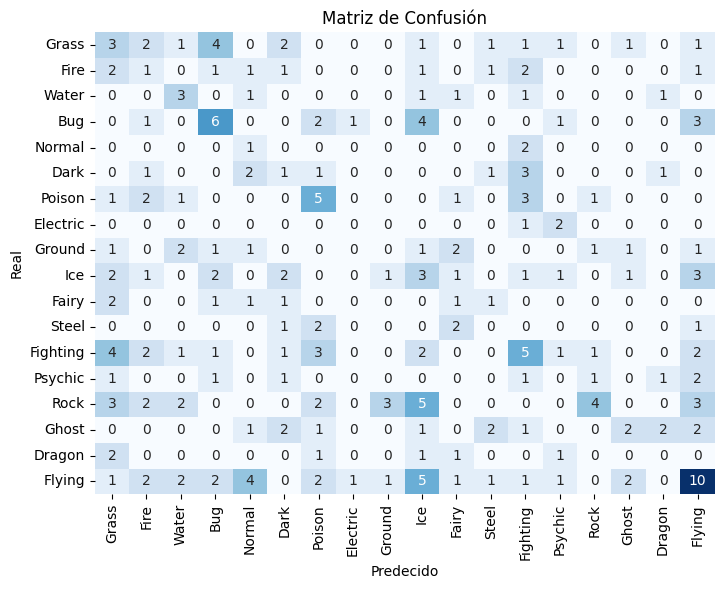

In [ ]:
confusion = confusion_matrix(test_labels, clf_predictions_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=pokemon['Type'].unique(),
            yticklabels=pokemon['Type'].unique(),
            cbar=False)
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

* Se puede ver un modelo muy sobreajustado a los datos de entrenamiento. No logra generalizar bien.

* No predice bien ninguna clase.

#### Modelo con optimización de hiperparámetros

In [ ]:
# Valores de parametros a probar
param_grid = {
    'max_features': [3, 5, 6, 7, 9],
    'max_depth': [6, 9, 10, 11],
    'criterion': ['gini', 'entropy'],  # Prueba ambos criterios
    'min_samples_split': [2, 5, 10, 15, 20]  # Diferentes valores para min_samples_split
}

# Optimizacion de hiperparametros. Como son muchas combinaciones posibles optimizamos con un metodo que prueba aleatoriamente combinaciones de valores de parametros
# establecidos previamente
random_search = RandomizedSearchCV(
    tree.DecisionTreeClassifier(random_state=0),  # Incluye un random_state opcional
    param_distributions=param_grid,
    n_iter=10,  # Número de configuraciones aleatorias a probar
    random_state=0  # Semilla para reproducibilidad
)
random_search.fit(train_features, train_labels)

# Mejores hiperparámetros encontrados durante la búsqueda aleatoria
best_params = random_search.best_params_

print(f'Mejores hiperparámetros: {best_params}')

Mejores hiperparámetros: {'min_samples_split': 2, 'max_features': 9, 'max_depth': 10, 'criterion': 'entropy'}


In [ ]:
# Mejor modelo
best_model = random_search.best_estimator_

# Predicciones de train
best_predictions_train = best_model.predict(train_features)

# Predicciones de test
best_predictions_test = best_model.predict(test_features)

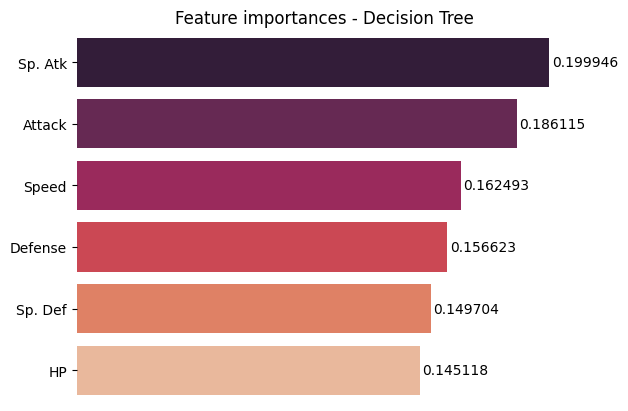

In [ ]:
#Creamos un DF con dos columnas -> Caracteristica y ganacia de informacion
features_df = pd.DataFrame({'features': feature_list, 'importances': best_model.feature_importances_ })

# Ordeno en base a la importancia
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

Metricas:

In [ ]:
# Metricas train:
accuracy_train = accuracy_score(train_labels, best_predictions_train)
precision_train = precision_score(train_labels, best_predictions_train, average='macro')
recall_train = recall_score(train_labels, best_predictions_train, average='macro')
f1_train = f1_score(train_labels, best_predictions_train, average='macro')

# Metricas test:
accuracy_test = accuracy_score(test_labels, best_predictions_test)
precision_test = precision_score(test_labels, best_predictions_test, average='macro')
recall_test = recall_score(test_labels, best_predictions_test, average='macro')
f1_test = f1_score(test_labels, best_predictions_test, average='macro')

metricas_arbol_clasificacion['80-20 c/o train'] = [accuracy_train, precision_train, recall_train, f1_train]
metricas_arbol_clasificacion['80-20 c/o test'] = [accuracy_test, precision_test, recall_test, f1_test]
metricas_arbol_clasificacion

,80-20 s/o train,80-20 s/o test,80-20 c/o train,80-20 c/o test
accuracy,0.977941,0.189076,0.831933,0.147059
precision,0.979446,0.154512,0.826861,0.151955
recall,0.982779,0.159478,0.852203,0.144481
f1-score,0.980622,0.144954,0.833391,0.140444


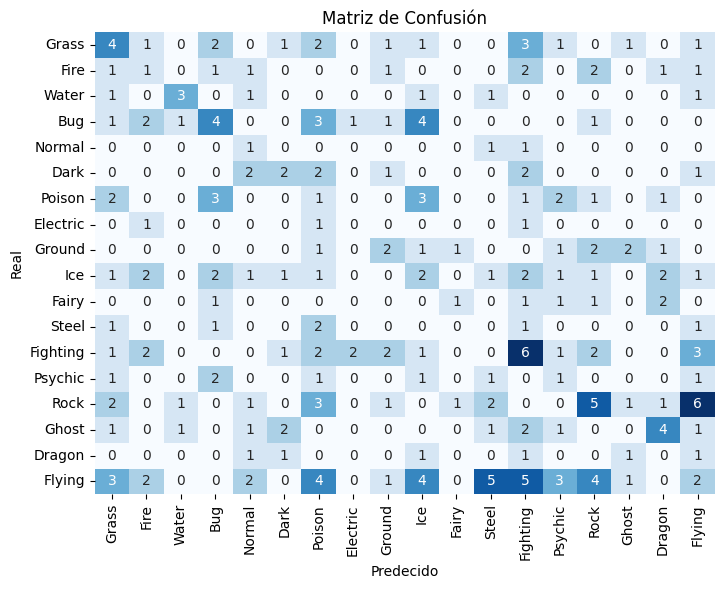

In [ ]:
confusion = confusion_matrix(test_labels, best_predictions_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=pokemon['Type'].unique(),
            yticklabels=pokemon['Type'].unique(),
            cbar=False)
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

* El modelo se ajusta peor que el anterior a los datos de entrenamiento, y aun se nota con mucho overfitting sobre los datos de test.

* En general con los hiperparametros que encontramos (optimizacion aleatoria)  el modelo encontrado es peor que el que no estaba optimizado.

* En la matriz de confusion se nota que no es bueno prediciendo ninguna clase.

### Segundo modelo (70% Train - 30% Test):

#### División train-test:

In [ ]:
# Division en train-test con division 70-30
df_train, df_test = train_test_split(pokemon, test_size=0.3, random_state=0)

In [ ]:
# Extraer las etiquetas (variable objetivo) de la columna 'Type' en los DataFrames 'df_train' y 'df_test', y convertirlas en arreglos NumPy.
train_labels = np.array(df_train['Type'])
test_labels = np.array(df_test['Type'])

# Eliminar las etiquetas y la columna 'Name' para separar las características (variables independientes) de la variable objetivo.
df_train = df_train.drop(['Type', 'Name'], axis=1)
df_test = df_test.drop(['Type', 'Name'], axis=1)

# Lista de nombres de características extrayendo los nombres de columna del DataFrame 'df_train' para usarlos luego.
feature_list = list(df_train.columns)

# Convierte los DataFrames modificados (sin las columnas 'Type' y 'Name), es decir, las características (variables independientes) a arrays.
train_features = np.array(df_train)
test_features = np.array(df_test)


#### Modelo sin optimizacion:

In [ ]:
# Creacion del modelo
clf = tree.DecisionTreeClassifier()

In [ ]:
#Entreno el modelo pasando las características de entrenamiento (train_features) y las etiquetas de entrenamiento correspondientes (train_labels).
decision_tree = clf.fit(train_features, train_labels)

# Predicción en el conjunto de entrenamiento
clf_predictions_train = clf.predict(train_features)

# Predicción en el conjunto de test
clf_predictions_test = clf.predict(test_features)

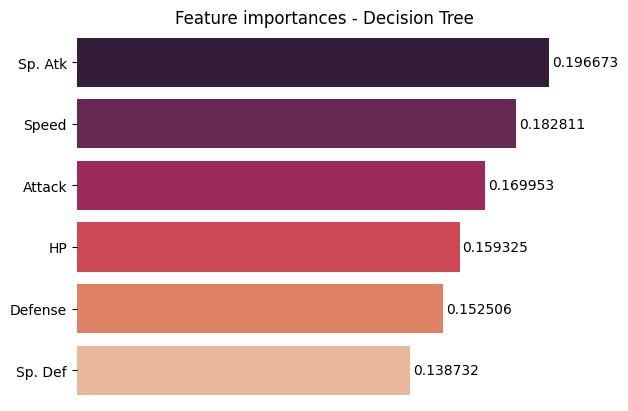

In [ ]:
#Creamos un DF con dos columnas -> Caracteristica y ganacia de informacion
features_df = pd.DataFrame({'features': feature_list, 'importances': decision_tree.feature_importances_ })

# Ordeno en base a la importancia
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

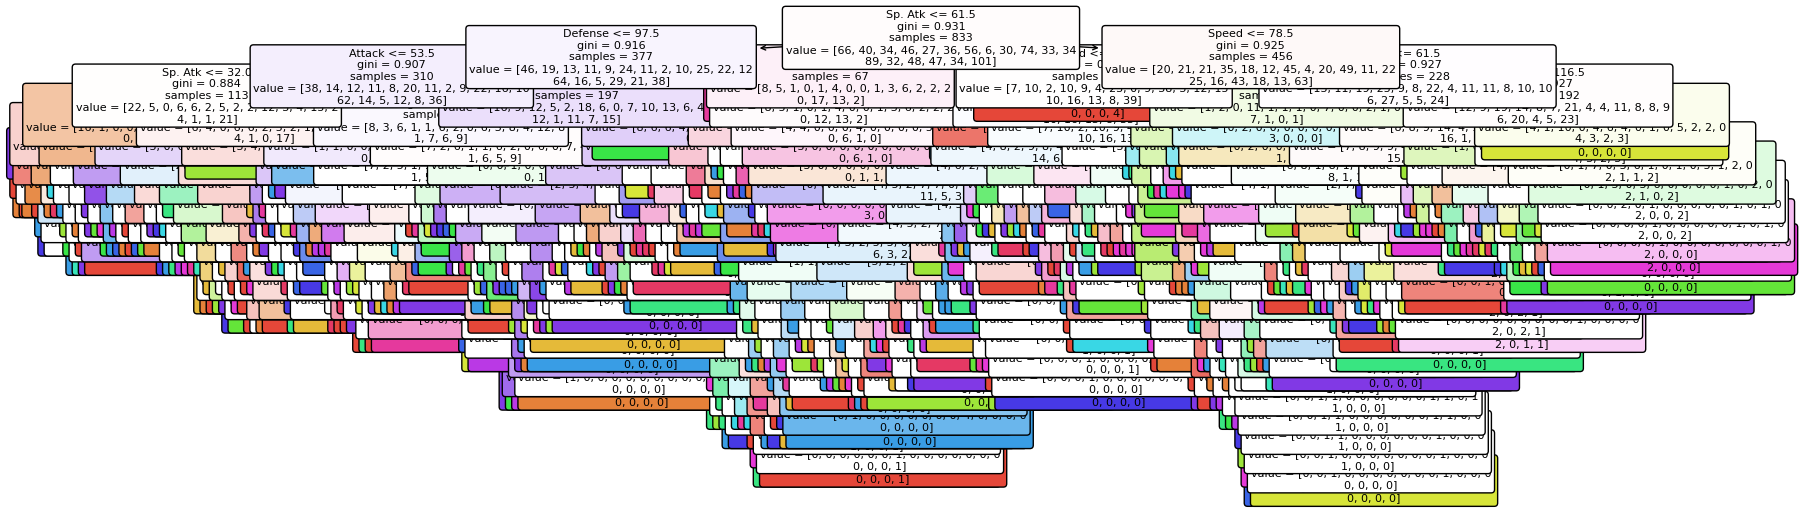

In [ ]:
features = feature_list
plt.figure(figsize=(20,6))
tree.plot_tree(decision_tree,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

Metricas:

In [ ]:
# Metricas train:
accuracy_train = accuracy_score(train_labels, clf_predictions_train)
precision_train = precision_score(train_labels, clf_predictions_train, average='macro')
recall_train = recall_score(train_labels, clf_predictions_train, average='macro')
f1_train = f1_score(train_labels, clf_predictions_train, average='macro')

# Metricas test:
accuracy_test = accuracy_score(test_labels, clf_predictions_test)
precision_test = precision_score(test_labels, clf_predictions_test, average='macro')
recall_test = recall_score(test_labels, clf_predictions_test, average='macro')
f1_test = f1_score(test_labels, clf_predictions_test, average='macro')

metricas_arbol_clasificacion['70-30 s/o train'] = [accuracy_train, precision_train, recall_train, f1_train]
metricas_arbol_clasificacion['70-30 s/o test'] = [accuracy_test, precision_test, recall_test, f1_test]
metricas_arbol_clasificacion

,80-20 s/o train,80-20 s/o test,80-20 c/o train,80-20 c/o test,70-30 s/o train,70-30 s/o test
accuracy,0.977941,0.189076,0.831933,0.147059,0.978391,0.156863
precision,0.979446,0.154512,0.826861,0.151955,0.979726,0.139978
recall,0.982779,0.159478,0.852203,0.144481,0.982678,0.140141
f1-score,0.980622,0.144954,0.833391,0.140444,0.980725,0.134316


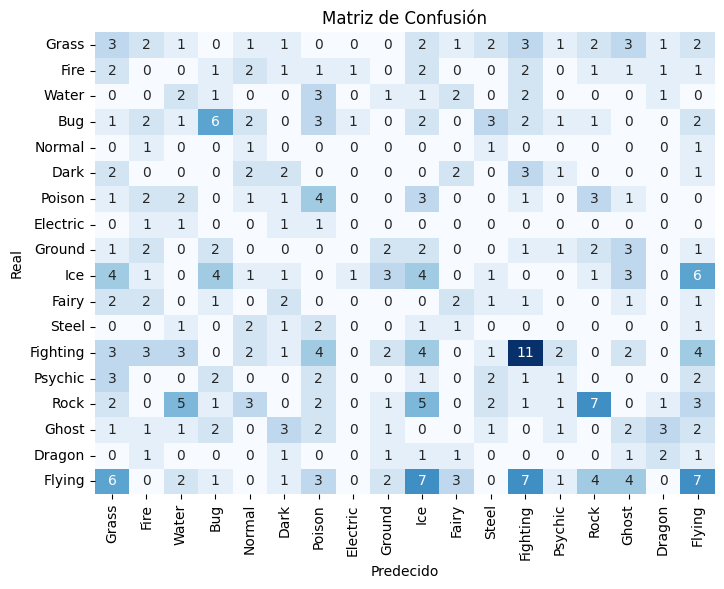

In [ ]:
confusion = confusion_matrix(test_labels, clf_predictions_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=pokemon['Type'].unique(),
            yticklabels=pokemon['Type'].unique(),
            cbar=False)
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

* Mismas conclusiones que con los anteriores modelos: mucho overfitting y baja capacidad predictiva.

#### Modelo con optimizacion de hiperparámetros:

In [ ]:
# Parametros a probar
param_grid = {
    'max_features': [3, 5, 6, 7, 9],
    'max_depth': [6, 9, 10, 11],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10, 15, 20]
}

# Optimizacion de hiperparametros
random_search = RandomizedSearchCV(
    tree.DecisionTreeClassifier(random_state=0),
    param_distributions=param_grid,
    n_iter=10,
    random_state=0
)
random_search.fit(train_features, train_labels)

# Mejores hiperparametros
best_params = random_search.best_params_

print(f'Mejores hiperparámetros: {best_params}')

Mejores hiperparámetros: {'min_samples_split': 10, 'max_features': 6, 'max_depth': 6, 'criterion': 'gini'}


In [ ]:
# Mejor modelo encontrado
best_model = random_search.best_estimator_

# Predicciones train
best_predictions_train = best_model.predict(train_features)

# Predicciones test
best_predictions_test = best_model.predict(test_features)

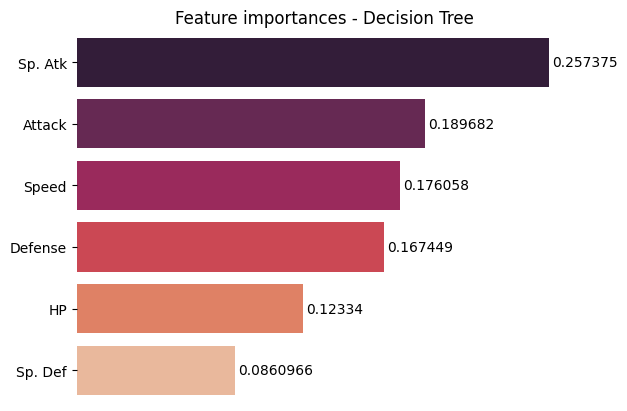

In [ ]:
#Creamos un DF con dos columnas -> Caracteristica y ganacia de informacion
features_df = pd.DataFrame({'features': feature_list, 'importances': best_model.feature_importances_ })

# Ordeno en base a la importancia
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

In [ ]:
features = feature_list
plt.figure(figsize=(20,6))
tree.plot_tree(best_model,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

Metricas:

In [ ]:
# Metricas train:
accuracy_train = accuracy_score(train_labels, best_predictions_train)
precision_train = precision_score(train_labels, best_predictions_train, average='macro')
recall_train = recall_score(train_labels, best_predictions_train, average='macro')
f1_train = f1_score(train_labels, best_predictions_train, average='macro')

# Metricas test:
accuracy_test = accuracy_score(test_labels, best_predictions_test)
precision_test = precision_score(test_labels, best_predictions_test, average='macro')
recall_test = recall_score(test_labels, best_predictions_test, average='macro')
f1_test = f1_score(test_labels, best_predictions_test, average='macro')

metricas_arbol_clasificacion['70-30 c/o train'] = [accuracy_train, precision_train, recall_train, f1_train]
metricas_arbol_clasificacion['70-30 c/o test'] = [accuracy_test, precision_test, recall_test, f1_test]
metricas_arbol_clasificacion

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,80-20 s/o train,80-20 s/o test,80-20 c/o train,80-20 c/o test,70-30 s/o train,70-30 s/o test,70-30 c/o train,70-30 c/o test
accuracy,0.977941,0.189076,0.831933,0.147059,0.978391,0.156863,0.316927,0.154062
precision,0.979446,0.154512,0.826861,0.151955,0.979726,0.139978,0.287446,0.107204
recall,0.982779,0.159478,0.852203,0.144481,0.982678,0.140141,0.268847,0.128946
f1-score,0.980622,0.144954,0.833391,0.140444,0.980725,0.134316,0.250146,0.108799


* Vemos metricas de train muy bajas ahora incluso, y las de test tambien.

* Incluso una advertencia de que no estaria prediciendo algunas clases.

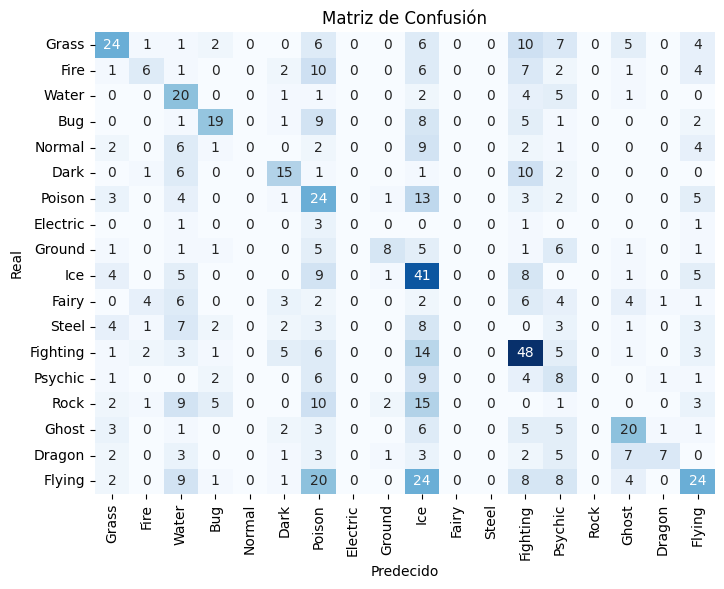

In [ ]:
confusion = confusion_matrix(train_labels, best_predictions_train)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=pokemon['Type'].unique(),
            yticklabels=pokemon['Type'].unique(),
            cbar=False)
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

* En datos de train se puede verificar. Hay clases que no se estan prediciendo como Normal, Electric, Fairy, Steel y Rock.

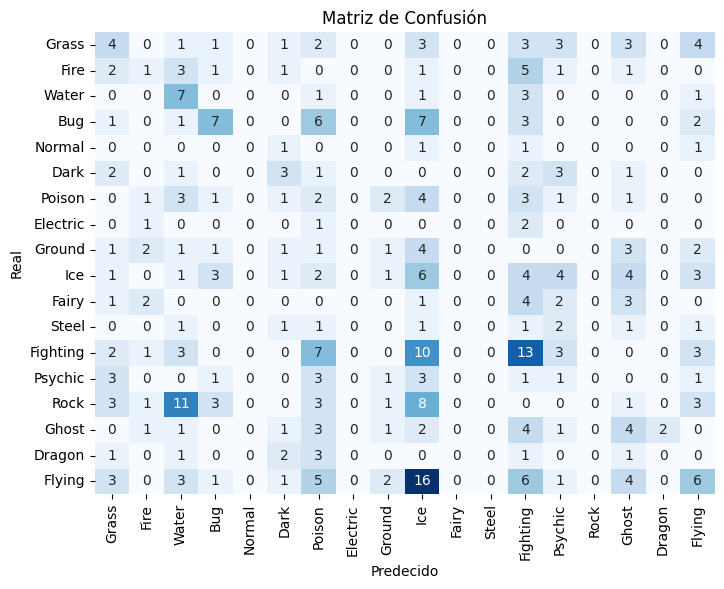

In [ ]:
confusion = confusion_matrix(test_labels, best_predictions_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=pokemon['Type'].unique(),
            yticklabels=pokemon['Type'].unique(),
            cbar=False)
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

* Y en datos de train las mismas clases no se estaria prediciendo.

### Conclusiones Decision Tree:

Segun las metricas obtenidas:

* Se lograron modelos con mucho overfitting.

* Ninguno de todos los modelos clasifica bien al menos una clase.

* Para este conjunto de datos clasificacion con Decision Tree no es una buena opcion.

*Nuevamente no estamos trabajando con metricas robustas. Se prefiere validacion cruzada (se adoptara en el proximo clasificador)*

## Bayes Ingenuo

Los atributos se encuentran ya normalizados entre 0 y 255 por lo que no hace falta estandarizarlos nuevamente.

In [ ]:
index = ['accuracy', 'precision', 'recall']

nb_estadisticas = pd.DataFrame(index=index)

### Modelo sin discretizar:

En primera instancia probaremos un modelo sin discretizar las caracteristicas:

In [ ]:
X_naive = pokemon.drop(['Name', 'Type'], axis=1)
Y_naive = pokemon['Type']

Las metricas se van a obtener con validacion cruzada:

#### Con GaussianNB:

In [ ]:
# Creacion del modelo
gnb_sin_discretizar = GaussianNB()

In [ ]:
# Definicion de las metricas para el scoring de cross_validate
metricas = {'accuracy': 'accuracy', 'precision': 'precision_macro', 'recall': 'recall_macro'}

In [ ]:
# Validacion cruzada para obtener metricas con k=5
cv_gnb_sin_discretizar = cross_validate(gnb_sin_discretizar, X_naive, Y_naive, cv=5, scoring=metricas, return_train_score=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Aparentemente en todas las iteraciones de la validacion cruzada el modelo no estaria prediciendo alguna clase

In [ ]:
# Aca estan todos los valores referidos tanto a train como a test para cada una de las iteraciones de la CV.
cv_gnb_sin_discretizar

{'fit_time': array([0.02351427, 0.01846504, 0.00824022, 0.03038096, 0.03079486]),
 'score_time': array([0.0336659 , 0.03056812, 0.01384377, 0.03682423, 0.0427866 ]),
 'test_accuracy': array([0.23529412, 0.19747899, 0.17647059, 0.15966387, 0.13445378]),
 'train_accuracy': array([0.18067227, 0.20168067, 0.21848739, 0.21533613, 0.21113445]),
 'test_precision': array([0.16303869, 0.19781345, 0.16881154, 0.08404757, 0.08424365]),
 'train_precision': array([0.1313884 , 0.16674261, 0.16382638, 0.18328567, 0.17085525]),
 'test_recall': array([0.18087522, 0.16046245, 0.15654592, 0.11863804, 0.09409906]),
 'train_recall': array([0.15217781, 0.16785405, 0.1745328 , 0.17845372, 0.17774115])}

In [ ]:
print("Resultados de la validación cruzada en TRAIN:")
print("Accuracy scores:", cv_gnb_sin_discretizar['train_accuracy'])
print("Precision scores:", cv_gnb_sin_discretizar['train_precision'])
print("Recall scores:", cv_gnb_sin_discretizar['train_recall'])
print(" ")
print("Mean accuracy score:", cv_gnb_sin_discretizar['train_accuracy'].mean())
print("Mean precision score:", cv_gnb_sin_discretizar['train_precision'].mean())
print("Mean recall score:", cv_gnb_sin_discretizar['train_recall'].mean())

Resultados de la validación cruzada en TRAIN:
Accuracy scores: [0.18067227 0.20168067 0.21848739 0.21533613 0.21113445]
Precision scores: [0.1313884  0.16674261 0.16382638 0.18328567 0.17085525]
Recall scores: [0.15217781 0.16785405 0.1745328  0.17845372 0.17774115]
 
Mean accuracy score: 0.20546218487394957
Mean precision score: 0.16321966382844774
Mean recall score: 0.170151904478852


De entrada ya son metricas muy pobres en train.

In [ ]:
# Calculo de las predicciones para cada fold de test
y_naive_pred = cross_val_predict(gnb_sin_discretizar, X_naive, Y_naive, cv=5)

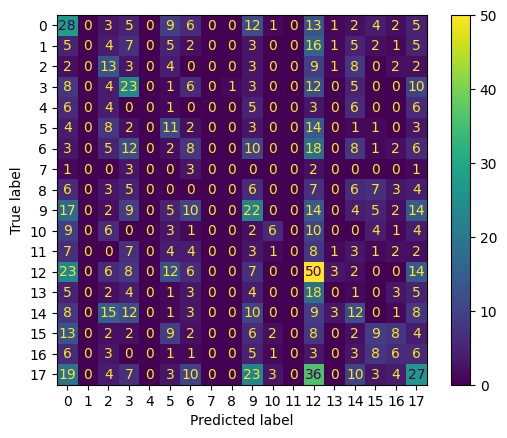

In [ ]:
# Matriz de confusion para TEST
cm_gnb = metrics.confusion_matrix(Y_naive, y_naive_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm_gnb).plot()

Aca se ve mejor que el modelo no puede predecir las clases 1, 4 y 11.

Otras clases como la 12, 0, 3 o 17 predice por demas.

In [ ]:
print("Resultados de la validación cruzada en TEST:")
print("Accuracy scores:", cv_gnb_sin_discretizar['test_accuracy'])
print("Precision scores:", cv_gnb_sin_discretizar['test_precision'])
print("Recall scores:", cv_gnb_sin_discretizar['test_recall'])
print(" ")
print("Mean accuracy score:", cv_gnb_sin_discretizar['test_accuracy'].mean())
print("Mean precision score:", cv_gnb_sin_discretizar['test_precision'].mean())
print("Mean recall score:", cv_gnb_sin_discretizar['test_recall'].mean())

Resultados de la validación cruzada en TEST:
Accuracy scores: [0.23529412 0.19747899 0.17647059 0.15966387 0.13445378]
Precision scores: [0.16303869 0.19781345 0.16881154 0.08404757 0.08424365]
Recall scores: [0.18087522 0.16046245 0.15654592 0.11863804 0.09409906]
 
Mean accuracy score: 0.18067226890756302
Mean precision score: 0.13959098051151747
Mean recall score: 0.14212413985782074


Se nota un rendimiento ligeramente menor en test que train.

In [ ]:
nb_estadisticas['GNB sin disc'] = [cv_gnb_sin_discretizar['test_accuracy'].mean(), cv_gnb_sin_discretizar['test_precision'].mean(), cv_gnb_sin_discretizar['test_recall'].mean()]

#### Con MultinomialNB:

In [ ]:
# Creacion del modelo
mnb_sin_discretizar = MultinomialNB()

In [ ]:
# Validacion cruzada para obtener metricas con k=5
cv_mnb_sin_discretizar = cross_validate(mnb_sin_discretizar, X_naive, Y_naive, cv=5, scoring=metricas, return_train_score=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Mismo problema para predecir determinadas clases.

In [ ]:
# Aca estan todos los valores referidos tanto a train como a test para cada una de las iteraciones de la CV.
cv_mnb_sin_discretizar

{'fit_time': array([0.01493597, 0.00570107, 0.00544286, 0.00916076, 0.00578761]),
 'score_time': array([0.00991416, 0.00664496, 0.00736499, 0.00833654, 0.00757813]),
 'test_accuracy': array([0.21848739, 0.18487395, 0.17226891, 0.09243697, 0.12184874]),
 'train_accuracy': array([0.16596639, 0.18067227, 0.18382353, 0.18277311, 0.20588235]),
 'test_precision': array([0.16904553, 0.10625088, 0.13121903, 0.07851739, 0.08075395]),
 'train_precision': array([0.13792661, 0.13781965, 0.12773805, 0.15282751, 0.16928745]),
 'test_recall': array([0.21605447, 0.16440951, 0.15612735, 0.08357317, 0.11261223]),
 'train_recall': array([0.15267406, 0.16684135, 0.17311272, 0.1858623 , 0.20137477])}

In [ ]:
print("Resultados de la validación cruzada en TRAIN:")
print("Accuracy scores:", cv_mnb_sin_discretizar['train_accuracy'])
print("Precision scores:", cv_mnb_sin_discretizar['train_precision'])
print("Recall scores:", cv_mnb_sin_discretizar['train_recall'])
print(" ")
print("Mean accuracy score:", cv_mnb_sin_discretizar['train_accuracy'].mean())
print("Mean precision score:", cv_mnb_sin_discretizar['train_precision'].mean())
print("Mean recall score:", cv_mnb_sin_discretizar['train_recall'].mean())

Resultados de la validación cruzada en TRAIN:
Accuracy scores: [0.16596639 0.18067227 0.18382353 0.18277311 0.20588235]
Precision scores: [0.13792661 0.13781965 0.12773805 0.15282751 0.16928745]
Recall scores: [0.15267406 0.16684135 0.17311272 0.1858623  0.20137477]
 
Mean accuracy score: 0.18382352941176472
Mean precision score: 0.1451198545633739
Mean recall score: 0.17597304110389383


Nuevamente rendimiento muy pobre en train

In [ ]:
# Calculo de las predicciones para cada fold de test
y_naive_pred_mnb_sin_disc = cross_val_predict(mnb_sin_discretizar, X_naive, Y_naive, cv=5)

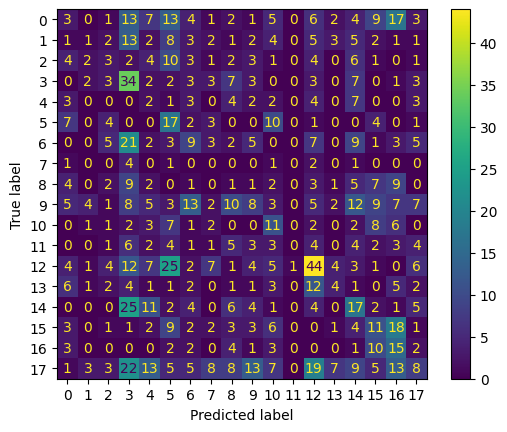

In [ ]:
# Matriz de confusion para TEST
cm_mnb = metrics.confusion_matrix(Y_naive, y_naive_pred_mnb_sin_disc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm_mnb).plot()

Esta vez el modelo tuvo problemas para predecir la clase 11.

In [ ]:
print("Resultados de la validación cruzada en TEST:")
print("Accuracy scores:", cv_mnb_sin_discretizar['test_accuracy'])
print("Precision scores:", cv_mnb_sin_discretizar['test_precision'])
print("Recall scores:", cv_mnb_sin_discretizar['test_recall'])
print(" ")
print("Mean accuracy score:", cv_mnb_sin_discretizar['test_accuracy'].mean())
print("Mean precision score:", cv_mnb_sin_discretizar['test_precision'].mean())
print("Mean recall score:", cv_mnb_sin_discretizar['test_recall'].mean())

Resultados de la validación cruzada en TEST:
Accuracy scores: [0.21848739 0.18487395 0.17226891 0.09243697 0.12184874]
Precision scores: [0.16904553 0.10625088 0.13121903 0.07851739 0.08075395]
Recall scores: [0.21605447 0.16440951 0.15612735 0.08357317 0.11261223]
 
Mean accuracy score: 0.15798319327731092
Mean precision score: 0.11315735703985715
Mean recall score: 0.14655534740220338


Nuevamente metricas muy bajas en general.

Las metricas de test son incluso peor que las del modelo GaussianNB.

In [ ]:
nb_estadisticas['MNB sin disc'] = [cv_mnb_sin_discretizar['test_accuracy'].mean(), cv_mnb_sin_discretizar['test_precision'].mean(), cv_mnb_sin_discretizar['test_recall'].mean()]

#### Con BernoulliNB:

In [ ]:
# Creacion del modelo
bnb_sin_discretizar = BernoulliNB()

In [ ]:
# Validacion cruzada para obtener metricas con k=5
cv_bnb_sin_discretizar = cross_validate(bnb_sin_discretizar, X_naive, Y_naive, cv=5, scoring=metricas, return_train_score=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Continua el problema para predecir ciertas clases

In [ ]:
# Aca estan todos los valores referidos tanto a train como a test para cada una de las iteraciones de la CV.
cv_bnb_sin_discretizar

{'fit_time': array([0.01232553, 0.00586462, 0.00568557, 0.00555468, 0.00635338]),
 'score_time': array([0.01431656, 0.00815749, 0.00756526, 0.00733376, 0.00756836]),
 'test_accuracy': array([0.12605042, 0.12605042, 0.12605042, 0.12184874, 0.12605042]),
 'train_accuracy': array([0.125     , 0.125     , 0.125     , 0.12605042, 0.125     ]),
 'test_precision': array([0.0070028 , 0.0070028 , 0.0070028 , 0.00676937, 0.0070028 ]),
 'train_precision': array([0.00694444, 0.00694444, 0.00694444, 0.0070028 , 0.00694444]),
 'test_recall': array([0.05555556, 0.05555556, 0.05555556, 0.05555556, 0.05555556]),
 'train_recall': array([0.05555556, 0.05555556, 0.05555556, 0.05555556, 0.05555556])}

In [ ]:
print("Resultados de la validación cruzada en TRAIN:")
print("Accuracy scores:", cv_bnb_sin_discretizar['train_accuracy'])
print("Precision scores:", cv_bnb_sin_discretizar['train_precision'])
print("Recall scores:", cv_bnb_sin_discretizar['train_recall'])
print(" ")
print("Mean accuracy score:", cv_bnb_sin_discretizar['train_accuracy'].mean())
print("Mean precision score:", cv_bnb_sin_discretizar['train_precision'].mean())
print("Mean recall score:", cv_bnb_sin_discretizar['train_recall'].mean())

Resultados de la validación cruzada en TRAIN:
Accuracy scores: [0.125      0.125      0.125      0.12605042 0.125     ]
Precision scores: [0.00694444 0.00694444 0.00694444 0.0070028  0.00694444]
Recall scores: [0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]
 
Mean accuracy score: 0.12521008403361344
Mean precision score: 0.006956115779645192
Mean recall score: 0.05555555555555556


Las metricas son un desastre con BinomialNB

In [ ]:
# Calculo de las predicciones para cada fold de test
y_naive_pred_bnb_sin_disc = cross_val_predict(bnb_sin_discretizar, X_naive, Y_naive, cv=5)

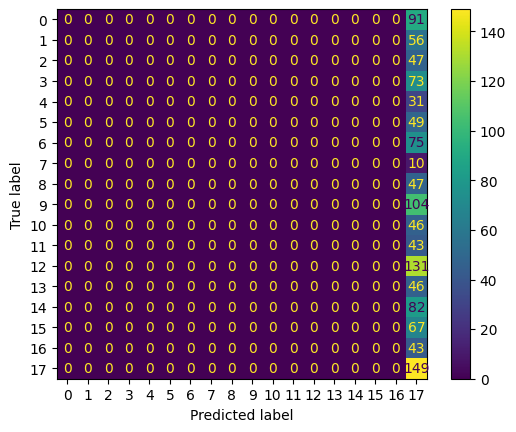

In [ ]:
# Matriz de confusion para TEST
cm_bnb = metrics.confusion_matrix(Y_naive, y_naive_pred_bnb_sin_disc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm_bnb).plot()

Solo predice una clase

In [ ]:
print("Resultados de la validación cruzada en TEST:")
print("Accuracy scores:", cv_bnb_sin_discretizar['test_accuracy'])
print("Precision scores:", cv_bnb_sin_discretizar['test_precision'])
print("Recall scores:", cv_bnb_sin_discretizar['test_recall'])
print(" ")
print("Mean accuracy score:", cv_bnb_sin_discretizar['test_accuracy'].mean())
print("Mean precision score:", cv_bnb_sin_discretizar['test_precision'].mean())
print("Mean recall score:", cv_bnb_sin_discretizar['test_recall'].mean())

Resultados de la validación cruzada en TEST:
Accuracy scores: [0.12605042 0.12605042 0.12605042 0.12184874 0.12605042]
Precision scores: [0.0070028  0.0070028  0.0070028  0.00676937 0.0070028 ]
Recall scores: [0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]
 
Mean accuracy score: 0.12521008403361344
Mean precision score: 0.006956115779645192
Mean recall score: 0.05555555555555556


In [ ]:
nb_estadisticas['BNB sin disc'] = [cv_bnb_sin_discretizar['test_accuracy'].mean(), cv_bnb_sin_discretizar['test_precision'].mean(), cv_bnb_sin_discretizar['test_recall'].mean()]

Fue una prueba.

De todos modos era de esperar que los resultados con BernoulliNB no sean buenos ya que nuestras caracteristicas no son booeleanas.

### Modelos con Primera discretizacion:

La discretizacion de los atributos se realizara del siguiente modo, para distribuir los valores de manera balanceada, guiandonos por la mediana y los cuartiles 1 y 3:

0 - Baja: entre 0 y 55

1 - Media: entre 56 y 89

2 - Alta: entre 90 y 255

#### Discretizacion:

In [ ]:
X_naive_disc_01 = pokemon.drop(['Name', 'Type'], axis=1)
Y_naive_disc_01 = pokemon['Type']

In [ ]:
# Define la función asignar_etiqueta
def asignar_etiqueta(x):
    if x >= 0 and x <= 55:
        return 0
    elif x >= 56 and x <= 89:
        return 1
    elif x >= 90 and x <= 150:
        return 2
    else:
        return 2  # Si el valor está fuera del rango d 0 a 255

for columna in X_naive_disc_01.columns:
    X_naive_disc_01[columna] = X_naive_disc_01[columna].apply(asignar_etiqueta)

#### Con GaussianNB:

In [ ]:
# Creacion del modelo
gnb_disc_01 = GaussianNB()

In [ ]:
# Validacion cruzada para obtener metricas con k=5
cv_gnb_disc_01 = cross_validate(gnb_disc_01, X_naive_disc_01, Y_naive_disc_01, cv=5, scoring=metricas, return_train_score=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Continuamos con el problema de precision

In [ ]:
# Aca estan todos los valores referidos tanto a train como a test para cada una de las iteraciones de la CV.
cv_gnb_disc_01

{'fit_time': array([0.00958371, 0.00561213, 0.00503302, 0.00513077, 0.00515652]),
 'score_time': array([0.01095772, 0.0081563 , 0.00806046, 0.00846314, 0.00845909]),
 'test_accuracy': array([0.19327731, 0.16386555, 0.15966387, 0.1302521 , 0.11344538]),
 'train_accuracy': array([0.16281513, 0.17016807, 0.17962185, 0.17962185, 0.18487395]),
 'test_precision': array([0.14821148, 0.11377925, 0.1917204 , 0.06863532, 0.08335638]),
 'train_precision': array([0.1235148 , 0.12638565, 0.12534508, 0.13814004, 0.14239595]),
 'test_recall': array([0.16478429, 0.14512532, 0.14137   , 0.10115483, 0.0841968 ]),
 'train_recall': array([0.13349893, 0.14684234, 0.1473732 , 0.15309459, 0.15475188])}

In [ ]:
print("Resultados de la validación cruzada en TRAIN:")
print("Accuracy scores:", cv_gnb_disc_01['train_accuracy'])
print("Precision scores:", cv_gnb_disc_01['train_precision'])
print("Recall scores:", cv_gnb_disc_01['train_recall'])
print(" ")
print("Mean accuracy score:", cv_gnb_disc_01['train_accuracy'].mean())
print("Mean precision score:", cv_gnb_disc_01['train_precision'].mean())
print("Mean recall score:", cv_gnb_disc_01['train_recall'].mean())

Resultados de la validación cruzada en TRAIN:
Accuracy scores: [0.16281513 0.17016807 0.17962185 0.17962185 0.18487395]
Precision scores: [0.1235148  0.12638565 0.12534508 0.13814004 0.14239595]
Recall scores: [0.13349893 0.14684234 0.1473732  0.15309459 0.15475188]
 
Mean accuracy score: 0.1754201680672269
Mean precision score: 0.13115630405416043
Mean recall score: 0.1471121875589802


In [ ]:
# Calculo de las predicciones para cada fold de test
y_naive_pred_gnb_disc_01 = cross_val_predict(gnb_disc_01, X_naive_disc_01, Y_naive_disc_01, cv=5)

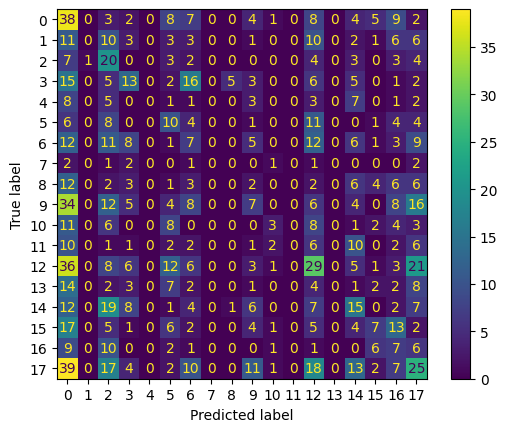

In [ ]:
# Matriz de confusion para TEST
cm_gnb_disc_01 = metrics.confusion_matrix(Y_naive_disc_01, y_naive_pred_gnb_disc_01)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm_gnb_disc_01).plot()

Problemas para predecir clases 4, 7, 8 y 11.

Se predeice demasiado la clase 0, la 2, la 17 entre otras.

In [ ]:
print("Resultados de la validación cruzada en TEST:")
print("Accuracy scores:", cv_gnb_disc_01['test_accuracy'])
print("Precision scores:", cv_gnb_disc_01['test_precision'])
print("Recall scores:", cv_gnb_disc_01['test_recall'])
print(" ")
print("Mean accuracy score:", cv_gnb_disc_01['test_accuracy'].mean())
print("Mean precision score:", cv_gnb_disc_01['test_precision'].mean())
print("Mean recall score:", cv_gnb_disc_01['test_recall'].mean())

Resultados de la validación cruzada en TEST:
Accuracy scores: [0.19327731 0.16386555 0.15966387 0.1302521  0.11344538]
Precision scores: [0.14821148 0.11377925 0.1917204  0.06863532 0.08335638]
Recall scores: [0.16478429 0.14512532 0.14137    0.10115483 0.0841968 ]
 
Mean accuracy score: 0.15210084033613444
Mean precision score: 0.12114056659547709
Mean recall score: 0.1273262458931415


In [ ]:
nb_estadisticas['GNB disc 01'] = [cv_gnb_disc_01['test_accuracy'].mean(), cv_gnb_disc_01['test_precision'].mean(), cv_gnb_disc_01['test_recall'].mean()]
nb_estadisticas

,GNB sin disc,MNB sin disc,BNB sin disc,GNB disc 01
accuracy,0.180672,0.157983,0.125210,0.152101
precision,0.139591,0.113157,0.006956,0.121141
recall,0.142124,0.146555,0.055556,0.127326


Misma situacion que antes, al parecer un poco de sobreajuste, por las metricas mas bajas en test que en train.

Esta vez tiene a predecir mucho la clase 0 sobre todo y destaca que hay nuevamente varias clases que no logra predecir.

#### Con MultinomialNB:

In [ ]:
# Creacion del modelo
mnb_disc_01 = MultinomialNB()

In [ ]:
# Validacion cruzada para obtener metricas con k=5
cv_mnb_disc_01 = cross_validate(mnb_disc_01, X_naive_disc_01, Y_naive_disc_01, cv=5, scoring=metricas, return_train_score=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
# Aca estan todos los valores referidos tanto a train como a test para cada una de las iteraciones de la CV.
cv_mnb_disc_01

{'fit_time': array([0.01024938, 0.00581932, 0.00562787, 0.0054512 , 0.00549841]),
 'score_time': array([0.00975704, 0.00721264, 0.00931334, 0.00714016, 0.00702143]),
 'test_accuracy': array([0.16386555, 0.17226891, 0.16806723, 0.13865546, 0.14705882]),
 'train_accuracy': array([0.16911765, 0.17857143, 0.17121849, 0.17752101, 0.18172269]),
 'test_precision': array([0.0793512 , 0.05431413, 0.06568287, 0.02535981, 0.04449063]),
 'train_precision': array([0.07450771, 0.11057654, 0.08629522, 0.09965639, 0.10856957]),
 'test_recall': array([0.08742114, 0.08742877, 0.08804616, 0.06889184, 0.07666814]),
 'train_recall': array([0.08563404, 0.098913  , 0.0934107 , 0.09493098, 0.09903069])}

In [ ]:
print("Resultados de la validación cruzada en TRAIN:")
print("Accuracy scores:", cv_mnb_disc_01['train_accuracy'])
print("Precision scores:", cv_mnb_disc_01['train_precision'])
print("Recall scores:", cv_mnb_disc_01['train_recall'])
print(" ")
print("Mean accuracy score:", cv_mnb_disc_01['train_accuracy'].mean())
print("Mean precision score:", cv_mnb_disc_01['train_precision'].mean())
print("Mean recall score:", cv_mnb_disc_01['train_recall'].mean())

Resultados de la validación cruzada en TRAIN:
Accuracy scores: [0.16911765 0.17857143 0.17121849 0.17752101 0.18172269]
Precision scores: [0.07450771 0.11057654 0.08629522 0.09965639 0.10856957]
Recall scores: [0.08563404 0.098913   0.0934107  0.09493098 0.09903069]
 
Mean accuracy score: 0.17563025210084032
Mean precision score: 0.09592108586918016
Mean recall score: 0.09438388252006442


In [ ]:
# Calculo de las predicciones para cada fold de test
y_naive_pred_mnb_disc_01 = cross_val_predict(mnb_disc_01, X_naive_disc_01, Y_naive_disc_01, cv=5)

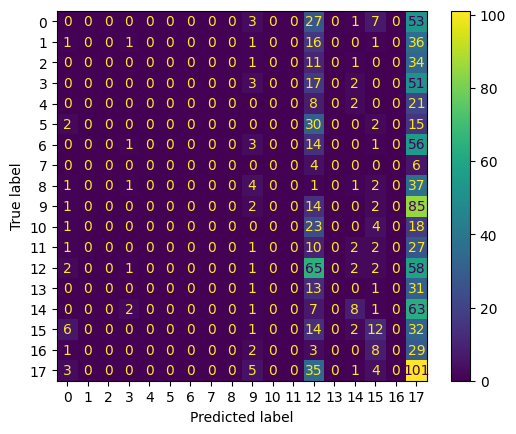

In [ ]:
# Matriz de confusion para TEST
cm_mnb_disc_01 = metrics.confusion_matrix(Y_naive_disc_01, y_naive_pred_mnb_disc_01)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm_mnb_disc_01).plot()

Muchas clases sin predecir.

In [ ]:
print("Resultados de la validación cruzada en TEST:")
print("Accuracy scores:", cv_mnb_disc_01['test_accuracy'])
print("Precision scores:", cv_mnb_disc_01['test_precision'])
print("Recall scores:", cv_mnb_disc_01['test_recall'])
print(" ")
print("Mean accuracy score:", cv_mnb_disc_01['test_accuracy'].mean())
print("Mean precision score:", cv_mnb_disc_01['test_precision'].mean())
print("Mean recall score:", cv_mnb_disc_01['test_recall'].mean())

Resultados de la validación cruzada en TEST:
Accuracy scores: [0.16386555 0.17226891 0.16806723 0.13865546 0.14705882]
Precision scores: [0.0793512  0.05431413 0.06568287 0.02535981 0.04449063]
Recall scores: [0.08742114 0.08742877 0.08804616 0.06889184 0.07666814]
 
Mean accuracy score: 0.15798319327731092
Mean precision score: 0.05383972925274024
Mean recall score: 0.0816912099515773


In [ ]:
nb_estadisticas['MNB disc 01'] = [cv_mnb_disc_01['test_accuracy'].mean(), cv_mnb_disc_01['test_precision'].mean(), cv_mnb_disc_01['test_recall'].mean()]
nb_estadisticas

,GNB sin disc,MNB sin disc,BNB sin disc,GNB disc 01,MNB disc 01
accuracy,0.180672,0.157983,0.125210,0.152101,0.157983
precision,0.139591,0.113157,0.006956,0.121141,0.053840
recall,0.142124,0.146555,0.055556,0.127326,0.081691


Mismo problema entre train y test que siempre.
Todas las metricas demasiado bajas, sobre todo precision y recall. El modelo predice muy pocas clases y entre ellas tiene a predecir mas que nada 2.

Hasta ahora los modelos Gaussianos tendrieron a dar mas altos que los multinomiales.

### Modelo con Segunda discretizacion:

#### Discretizacion:

La discretizacion de los atributos se realizara del siguiente modo, con el propósito de subdividir las 3 categorias anteriores por mitades:

0 y 1: entre 0 y 55

2 y 3: entre 56 y 110

4 y 5: entre 111 y 255

In [ ]:
X_naive_disc_02 = pokemon.drop(['Name', 'Type'], axis=1)
Y_naive_disc_02 = pokemon['Type']

In [ ]:
# Discretizacion de atributos con LabelEncoding:
def asignar_etiqueta(x):
    if x >= 0 and x <= 26:
        return 0
    elif x >= 27 and x <= 55:
        return 1
    elif x >= 56 and x <= 82:
        return 2
    elif x >= 83 and x <= 110:
        return 3
    elif x >= 111 and x <= 137:
        return 4
    else:
        return 5

for columna in X_naive.columns:
    X_naive_disc_02[columna] = X_naive_disc_02[columna].apply(asignar_etiqueta)

#### Con GaussianNB:

In [ ]:
# Creacion del modelo
gnb_disc_02 = GaussianNB()

In [ ]:
# Validacion cruzada para obtener metricas con k=5
cv_gnb_disc_02 = cross_validate(gnb_disc_02, X_naive_disc_02, Y_naive_disc_02, cv=5, scoring=metricas, return_train_score=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
# Aca estan todos los valores referidos tanto a train como a test para cada una de las iteraciones de la CV.
cv_gnb_disc_02

{'fit_time': array([0.01129651, 0.00524879, 0.00889802, 0.00656414, 0.00548482]),
 'score_time': array([0.00856638, 0.007864  , 0.00939536, 0.01121473, 0.00842738]),
 'test_accuracy': array([0.21428571, 0.17226891, 0.15546218, 0.13865546, 0.13865546]),
 'train_accuracy': array([0.17331933, 0.19852941, 0.20693277, 0.21638655, 0.20693277]),
 'test_precision': array([0.19189464, 0.16883188, 0.12442951, 0.08323789, 0.10050491]),
 'train_precision': array([0.17644286, 0.14298038, 0.14296958, 0.16213652, 0.21244243]),
 'test_recall': array([0.16057268, 0.13578381, 0.13818861, 0.104191  , 0.11285641]),
 'train_recall': array([0.14647952, 0.16370489, 0.16461238, 0.17995503, 0.17312083])}

In [ ]:
print("Resultados de la validación cruzada en TRAIN:")
print("Accuracy scores:", cv_gnb_disc_02['train_accuracy'])
print("Precision scores:", cv_gnb_disc_02['train_precision'])
print("Recall scores:", cv_gnb_disc_02['train_recall'])
print(" ")
print("Mean accuracy score:", cv_gnb_disc_02['train_accuracy'].mean())
print("Mean precision score:", cv_gnb_disc_02['train_precision'].mean())
print("Mean recall score:", cv_gnb_disc_02['train_recall'].mean())

Resultados de la validación cruzada en TRAIN:
Accuracy scores: [0.17331933 0.19852941 0.20693277 0.21638655 0.20693277]
Precision scores: [0.17644286 0.14298038 0.14296958 0.16213652 0.21244243]
Recall scores: [0.14647952 0.16370489 0.16461238 0.17995503 0.17312083]
 
Mean accuracy score: 0.2004201680672269
Mean precision score: 0.16739435551677415
Mean recall score: 0.16557453007746747


In [ ]:
# Calculo de las predicciones para cada fold de test
y_naive_pred_gnb_disc_02 = cross_val_predict(gnb_disc_02, X_naive_disc_02, Y_naive_disc_02, cv=5)

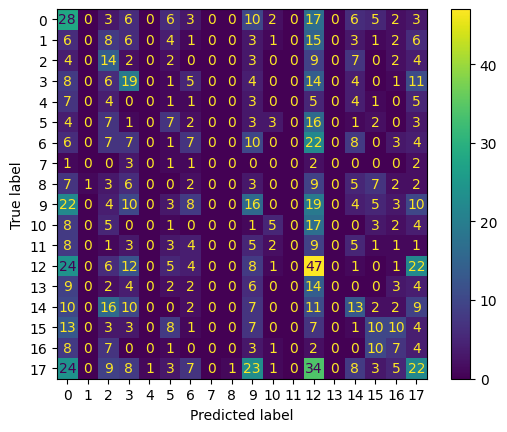

In [ ]:
# Matriz de confusion para TEST
cm_gnb_disc_02 = metrics.confusion_matrix(Y_naive_disc_02, y_naive_pred_gnb_disc_02)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm_gnb_disc_02).plot()

Tenemos problemas de prediccion de clases

In [ ]:
print("Resultados de la validación cruzada en TEST:")
print("Accuracy scores:", cv_gnb_disc_02['test_accuracy'])
print("Precision scores:", cv_gnb_disc_02['test_precision'])
print("Recall scores:", cv_gnb_disc_02['test_recall'])
print(" ")
print("Mean accuracy score:", cv_gnb_disc_02['test_accuracy'].mean())
print("Mean precision score:", cv_gnb_disc_02['test_precision'].mean())
print("Mean recall score:", cv_gnb_disc_02['test_recall'].mean())

Resultados de la validación cruzada en TEST:
Accuracy scores: [0.21428571 0.17226891 0.15546218 0.13865546 0.13865546]
Precision scores: [0.19189464 0.16883188 0.12442951 0.08323789 0.10050491]
Recall scores: [0.16057268 0.13578381 0.13818861 0.104191   0.11285641]
 
Mean accuracy score: 0.1638655462184874
Mean precision score: 0.13377976596478883
Mean recall score: 0.13031850217487145


In [ ]:
nb_estadisticas['GNB disc 02'] = [cv_gnb_disc_02['test_accuracy'].mean(), cv_gnb_disc_02['test_precision'].mean(), cv_gnb_disc_02['test_recall'].mean()]
nb_estadisticas

,GNB sin disc,MNB sin disc,BNB sin disc,GNB disc 01,MNB disc 01,GNB disc 02
accuracy,0.180672,0.157983,0.125210,0.152101,0.157983,0.163866
precision,0.139591,0.113157,0.006956,0.121141,0.053840,0.133780
recall,0.142124,0.146555,0.055556,0.127326,0.081691,0.130319


No ha mejorado demasiado.

### Modelo con Tercera discretizacion:

#### Discretizacion:

Ahora dividimos en 10 clases agrupando de acuerdo a intervalos formados por valores relativos a percentiles.

In [ ]:
X_naive_disc_03 = pokemon.drop(['Name', 'Type'], axis=1)
Y_naive_disc_03 = pokemon['Type']

In [ ]:
cantidad_clases = 10
rango_percentiles = list(range(0, 101, int(100/cantidad_clases)))

def asignar_etiqueta(x, percentiles):
    for i in range(len(percentiles)):
        if i != (len(percentiles) - 2):
            if x >= percentiles[i] and x < percentiles[i + 1]:
                return i
        else:
            if x >= percentiles[i] and x <= percentiles[i + 1]:
                return i



for columna in X_naive_disc_03:
    percentiles = np.percentile(X_naive_disc_03[columna], rango_percentiles).tolist()
    X_naive_disc_03[columna] = X_naive_disc_03[columna].apply(asignar_etiqueta, args=(percentiles,))

#### Con GaussianNB:

In [ ]:
# Creacion del modelo
gnb_disc_03 = GaussianNB()

In [ ]:
# Validacion cruzada para obtener metricas con k=5
cv_gnb_disc_03 = cross_validate(gnb_disc_03, X_naive_disc_03, Y_naive_disc_03, cv=5, scoring=metricas, return_train_score=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
# Aca estan todos los valores referidos tanto a train como a test para cada una de las iteraciones de la CV.
cv_gnb_disc_03

{'fit_time': array([0.01181149, 0.00556636, 0.00594139, 0.00488925, 0.00487566]),
 'score_time': array([0.01152587, 0.00981522, 0.00922441, 0.00797343, 0.01102185]),
 'test_accuracy': array([0.21428571, 0.15966387, 0.17647059, 0.14285714, 0.10504202]),
 'train_accuracy': array([0.17331933, 0.18592437, 0.18277311, 0.18697479, 0.18382353]),
 'test_precision': array([0.18853725, 0.08535338, 0.12373934, 0.08150274, 0.08509154]),
 'train_precision': array([0.1420222 , 0.20475214, 0.11415704, 0.14130707, 0.14639405]),
 'test_recall': array([0.17980345, 0.13512753, 0.14117168, 0.11146955, 0.0859127 ]),
 'train_recall': array([0.14418755, 0.1576516 , 0.15676933, 0.15464306, 0.15425286])}

In [ ]:
print("Resultados de la validación cruzada en TRAIN:")
print("Accuracy scores:", cv_gnb_disc_03['train_accuracy'])
print("Precision scores:", cv_gnb_disc_03['train_precision'])
print("Recall scores:", cv_gnb_disc_03['train_recall'])
print(" ")
print("Mean accuracy score:", cv_gnb_disc_03['train_accuracy'].mean())
print("Mean precision score:", cv_gnb_disc_03['train_precision'].mean())
print("Mean recall score:", cv_gnb_disc_03['train_recall'].mean())

Resultados de la validación cruzada en TRAIN:
Accuracy scores: [0.17331933 0.18592437 0.18277311 0.18697479 0.18382353]
Precision scores: [0.1420222  0.20475214 0.11415704 0.14130707 0.14639405]
Recall scores: [0.14418755 0.1576516  0.15676933 0.15464306 0.15425286]
 
Mean accuracy score: 0.18256302521008402
Mean precision score: 0.14972649904384566
Mean recall score: 0.153500879245138


In [ ]:
# Calculo de las predicciones para cada fold de test
y_naive_pred_gnb_disc_03 = cross_val_predict(gnb_disc_03, X_naive_disc_03, Y_naive_disc_03, cv=5)

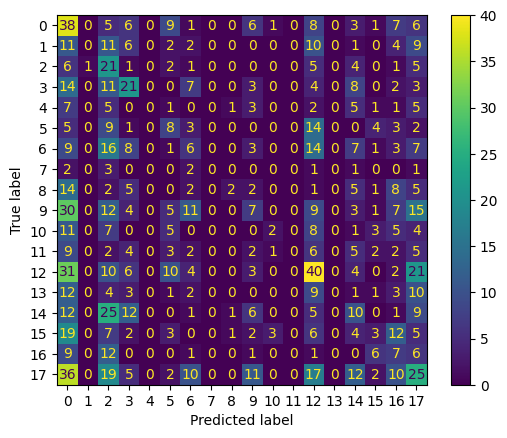

In [ ]:
# Matriz de confusion para TEST
cm_gnb_disc_03 = metrics.confusion_matrix(Y_naive_disc_03, y_naive_pred_gnb_disc_03)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm_gnb_disc_03).plot()

In [ ]:
print("Resultados de la validación cruzada en TEST:")
print("Accuracy scores:", cv_gnb_disc_03['test_accuracy'])
print("Precision scores:", cv_gnb_disc_03['test_precision'])
print("Recall scores:", cv_gnb_disc_03['test_recall'])
print(" ")
print("Mean accuracy score:", cv_gnb_disc_03['test_accuracy'].mean())
print("Mean precision score:", cv_gnb_disc_03['test_precision'].mean())
print("Mean recall score:", cv_gnb_disc_03['test_recall'].mean())

Resultados de la validación cruzada en TEST:
Accuracy scores: [0.21428571 0.15966387 0.17647059 0.14285714 0.10504202]
Precision scores: [0.18853725 0.08535338 0.12373934 0.08150274 0.08509154]
Recall scores: [0.17980345 0.13512753 0.14117168 0.11146955 0.0859127 ]
 
Mean accuracy score: 0.15966386554621848
Mean precision score: 0.11284484793331599
Mean recall score: 0.13069698187856796


In [ ]:
nb_estadisticas['GNB disc 03'] = [cv_gnb_disc_03['test_accuracy'].mean(), cv_gnb_disc_03['test_precision'].mean(), cv_gnb_disc_03['test_recall'].mean()]

Incluso discretizando con 10 clases no llega a clasificar bien.

### Conclusion Naive Bayes:

In [ ]:
nb_estadisticas

,GNB sin disc,MNB sin disc,BNB sin disc,GNB disc 01,MNB disc 01,GNB disc 02,GNB disc 03
accuracy,0.180672,0.157983,0.125210,0.152101,0.157983,0.163866,0.159664
precision,0.139591,0.113157,0.006956,0.121141,0.053840,0.133780,0.112845
recall,0.142124,0.146555,0.055556,0.127326,0.081691,0.130319,0.130697


* El mejor modelo que se logro posiblemente sea el de GaussianNB sin discretizar, pero de todos modos es un modelo muy pobre.

* En general de ahi siempre las metricas fueron para abajo.

* **Como conclusion NaiveBayes no es un buen clasificador para nuestros datos.**

## K-NN:

Los atributos se encuentran ya normalizados entre 0 y 255 por lo que no hace falta estandarizarlos nuevamente.

In [ ]:
X_knn = pokemon.drop(['Name', 'Type'], axis=1)
Y_knn = pokemon['Type']

In [ ]:
# Definicion de las metricas para el scoring de cross_validate
metricas = {'accuracy': 'accuracy', 'precision': 'precision_macro', 'recall': 'recall_macro'}

In [ ]:
scaler = MinMaxScaler()
X_knn = scaler.fit_transform(X_knn)

### Primer Modelo:

Este primer modelo lo usamos para tener contra que comparar a la hora de optimizar hiperparametros.

Elegimos un k=35 que es la raiz cuadrada del nro de datos de entrenamiento. Como vamos a hacer CV la totalidad de datos seran los datos de entrenamiento (y tambien de testeo).

El resto de valores es todo por default.

In [ ]:
# Inicializar el clasificador KNN
knn_default = KNeighborsClassifier(n_neighbors=35, metric='minkowski', p=2)

# Validacion cruzada para obtener metricas con k=5
cv_knn_default = cross_validate(knn_default, X_knn, Y_knn, cv=5, scoring=metricas, return_train_score=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
cv_knn_default

{'fit_time': array([0.00434566, 0.00404096, 0.00396442, 0.00397396, 0.00385451]),
 'score_time': array([0.04373121, 0.03691411, 0.03785563, 0.03907847, 0.03763032]),
 'test_accuracy': array([0.26470588, 0.23109244, 0.24369748, 0.14705882, 0.16806723]),
 'train_accuracy': array([0.26155462, 0.2605042 , 0.25315126, 0.29411765, 0.29621849]),
 'test_precision': array([0.20913887, 0.16904723, 0.20077689, 0.08299224, 0.15350298]),
 'train_precision': array([0.20003228, 0.21755069, 0.24354221, 0.23646297, 0.24856142]),
 'test_recall': array([0.18520384, 0.16160884, 0.18398134, 0.1004887 , 0.11255879]),
 'train_recall': array([0.18971236, 0.19410505, 0.18419256, 0.22231103, 0.22704114])}

In [ ]:
# Calculos de promedios de metricas de CV.
indices_knn = ['accuracy', 'precision', 'recall']
metricas_knn_default = pd.DataFrame(index=indices_knn)
metricas_knn_default['metricas_train'] = [cv_knn_default['train_accuracy'].mean(), cv_knn_default['train_precision'].mean(), cv_knn_default['train_recall'].mean()]
metricas_knn_default['metricas_test'] = [cv_knn_default['test_accuracy'].mean(), cv_knn_default['test_precision'].mean(), cv_knn_default['test_recall'].mean()]

In [ ]:
# Calculo de las predicciones para cada fold de test
y_knn_pred_default = cross_val_predict(knn_default, X_knn, Y_knn, cv=5)

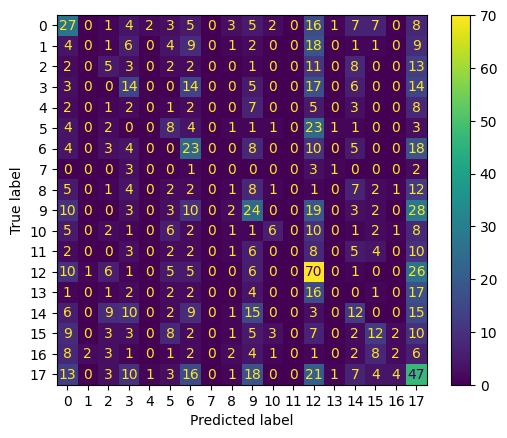

In [ ]:
# Matriz de confusion para TEST
cm_knn_default = metrics.confusion_matrix(Y_knn, y_knn_pred_default)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm_knn_default).plot()

In [ ]:
# Mostrar el informe de clasificación
print('\nInforme de Clasificación:')
print(classification_report(Y_knn, y_knn_pred_default))


Informe de Clasificación:
              precision    recall  f1-score   support

         Bug       0.23      0.30      0.26        91
        Dark       0.00      0.00      0.00        56
      Dragon       0.12      0.11      0.11        47
    Electric       0.19      0.19      0.19        73
       Fairy       0.00      0.00      0.00        31
    Fighting       0.15      0.16      0.16        49
        Fire       0.21      0.31      0.25        75
      Flying       0.00      0.00      0.00        10
       Ghost       0.07      0.02      0.03        47
       Grass       0.20      0.23      0.21       104
      Ground       0.43      0.13      0.20        46
         Ice       0.00      0.00      0.00        43
      Normal       0.27      0.53      0.36       131
      Poison       0.00      0.00      0.00        46
     Psychic       0.17      0.15      0.16        82
        Rock       0.28      0.18      0.22        67
       Steel       0.20      0.05      0.08        43


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
metricas_knn_default

,metricas_train,metricas_test
accuracy,0.273109,0.210924
precision,0.229230,0.163092
recall,0.203472,0.148768


Metricas de train por debajo de las metricas de test, el modelo sobreajusta.

Ademas clasifica bastante mal, tiende a predecir mucho algunas clases como la 17, la 12, la 1, por ej, y algunas como la 11 no las predice nunca.

### Segundo Modelo (con optimizacion de hiperparametros):

Buscamos optimizar los hiperparámetros mediante una busqueda por grilla, es en rango de 1,30 neigbors con paso 2, además de la variable "p" en L1 y L2 (Manhattan y Euclidea) y 2 opciones de peso.

In [ ]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, Y_knn, test_size=0.2, random_state=42)

In [ ]:
# Inicializar el clasificador KNN
knn_optimizado = KNeighborsClassifier()

# Definir los parámetros a ajustar
parametros_grid = {'n_neighbors':  range(30, 100, 2),
                   'p':[1,2],
                   'weights': ['uniform', 'distance']
                  }

# Inicializar el objeto GridSearchCV
grid_search = GridSearchCV(estimator = knn_optimizado,
                           param_grid = parametros_grid,
                           cv=5,
                           scoring='accuracy')

# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train_knn, y_train_knn)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtener el mejor modelo entrenado
knn_optimizado_mejor = grid_search.best_estimator_

Mejores hiperparámetros: {'n_neighbors': 58, 'p': 2, 'weights': 'distance'}


In [ ]:
# Realizar predicciones en el conjunto de entrenamiento
y_train_pred_knn = knn_optimizado_mejor.predict(X_train_knn)

# Mostrar el informe de clasificación
print('\nInforme de Clasificación:')
print(classification_report(y_train_knn, y_train_pred_knn))


Informe de Clasificación:
              precision    recall  f1-score   support

         Bug       1.00      1.00      1.00        73
        Dark       0.91      1.00      0.96        43
      Dragon       1.00      1.00      1.00        39
    Electric       0.98      1.00      0.99        61
       Fairy       0.96      1.00      0.98        22
    Fighting       1.00      0.98      0.99        41
        Fire       0.93      1.00      0.96        63
      Flying       1.00      0.88      0.93         8
       Ghost       1.00      1.00      1.00        39
       Grass       0.99      0.98      0.98        81
      Ground       0.93      1.00      0.96        40
         Ice       0.97      0.97      0.97        31
      Normal       0.99      0.97      0.98       104
      Poison       0.97      1.00      0.99        36
     Psychic       0.94      0.97      0.95        60
        Rock       1.00      1.00      1.00        57
       Steel       1.00      0.97      0.99        34


In [ ]:
# Realizar predicciones en el conjunto de prueba
y_test_pred_knn = knn_optimizado_mejor.predict(X_test_knn)

# Mostrar el informe de clasificación
print('\nInforme de Clasificación:')
print(classification_report(y_test_knn, y_test_pred_knn))


Informe de Clasificación:
              precision    recall  f1-score   support

         Bug       0.40      0.22      0.29        18
        Dark       0.00      0.00      0.00        13
      Dragon       0.18      0.25      0.21         8
    Electric       0.23      0.25      0.24        12
       Fairy       0.00      0.00      0.00         9
    Fighting       0.09      0.12      0.11         8
        Fire       0.13      0.33      0.19        12
      Flying       0.00      0.00      0.00         2
       Ghost       0.00      0.00      0.00         8
       Grass       0.05      0.04      0.05        23
      Ground       0.00      0.00      0.00         6
         Ice       0.00      0.00      0.00        12
      Normal       0.32      0.63      0.42        27
      Poison       0.00      0.00      0.00        10
     Psychic       0.17      0.09      0.12        22
        Rock       0.19      0.30      0.23        10
       Steel       0.00      0.00      0.00         9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nuevamente estamos ante una situacion de sobreajuste ademas de obtener metricas muy malas para test.

Seguimos sin poder predecir algunas clases

### Tercer Modelo:

Modificando el modelo con los hiperparámetros obtenidos: 'n_neighbors': 23, 'p': 2, 'weights': 'distance'
Obtenemos mejoría en todas las métricas, alcanzando una precisión del 0.20, ligeramente superior a la obtenida con Bayes ingenuo en el modelo sin discretizar sus variables.

In [ ]:
# Inicializar el clasificador KNN (K=3 en este caso)
knn_model = KNeighborsClassifier(n_neighbors=25, p=2, weights="distance")

# Entrenar el modelo
knn_model.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=25, weights='distance')

In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions = knn_model.predict(X_test_knn)


# Mostrar el informe de clasificación
print('\nInforme de Clasificación:')
print(classification_report(y_test_knn, predictions))


Informe de Clasificación:
              precision    recall  f1-score   support

         Bug       0.17      0.17      0.17        18
        Dark       0.00      0.00      0.00        13
      Dragon       0.25      0.38      0.30         8
    Electric       0.09      0.08      0.09        12
       Fairy       0.00      0.00      0.00         9
    Fighting       0.18      0.25      0.21         8
        Fire       0.19      0.42      0.26        12
      Flying       0.00      0.00      0.00         2
       Ghost       0.11      0.12      0.12         8
       Grass       0.21      0.22      0.21        23
      Ground       0.00      0.00      0.00         6
         Ice       0.00      0.00      0.00        12
      Normal       0.38      0.63      0.47        27
      Poison       0.00      0.00      0.00        10
     Psychic       0.20      0.09      0.13        22
        Rock       0.20      0.30      0.24        10
       Steel       1.00      0.11      0.20         9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


La busqueda de hiperparametros se hizo "a ojo" y se encontro el mejor modelo por ahora.

Aunque es un modelo demasiado pobre que tiene el mismo problemas que todos los vistos ultimamente (no predice algunas clases y de entrada tiene metricas de train muy bajas)

### Conclusion K-NN:

* Para nuestros datos evidentemente no es el algoritmo adecuado.

# Conclusiones Generales

* Con respecto al arbol de regresion y al dataset de las compañias se lograron al parecer buenos resultados. Decimos al parecer porque hay que recordar que las metricas obtenidas no son del todo robustas. Quizas faltaria agregarle la validacion cruzada, pero si nos guiamos por lo obtenido encontramos modelos con errores bajos y R2 ajustados bastante altos, casi sin overfitting.

* Con respecto al dataset de pokemon, no se logro que ninguno de los algoritmos de clasificacion (arbol de decision, naive bayes, knn) de algun resultado bueno. En general casi siempre hubo problemas para predecir una o varias clases, y cuando no lo hubo (solo en algunos casos de arboles de decision) se obtuvieron modelos muy malos en test y muy buenos en train (mucho overfitting). Es probable que estemos teniendo el inconveniente de una gran cantidad de clases (17), en un dataset muy heterogeneo (la mayoría son water y normal) y con relativamente pocos casos. Podemos notar, por ejemplo con Naive Bayes, que a las clases minoritarias ni siquiera las predice.

Parece que los modelos KNN son los que mejor responden al dataset, por ejemplo el 3er modelo con hiperparámetros similares a los obtenidos por optimización, arrojó accuracy de 0.24, precision promedio sin ponderar de 0.18 y recall con el mismo valor. Son valores, de todas maneras, muy bajos.